In [1]:
# the purpose of this program is to parse through all the 
import math
import numpy as np
import pandas as pd
import random
import os
import json
import pprint
import tensorflow as tf
import re 
from pandas.io.json import json_normalize
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn

from math import log
from math import sqrt
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

import statistics
from sklearn.preprocessing import MinMaxScaler

In [2]:
#%%timeit
initial_path = "/data/data"
root_dir = os.listdir(initial_path)
list_of_json = []
counter_total = 0;
for dir in root_dir:
    curr_path = initial_path + "/" + dir + "/enrichment/cert_info"
    #print(curr_dir)
    if os.path.exists(curr_path):
        curr_dir = os.listdir(curr_path)
        for sub_json in curr_dir:
        #do i need the last /
            each_json = curr_path + "/" + sub_json
            print(each_json)
            ran =random.random()
            if(ran<.10):
                counter_total = counter_total+1
                #print('counter_total'+ str(counter_total))
                list_of_json.append(each_json)
    else:
        pass    
print('counter_total'+ str(counter_total))

/data/data/2019-02-23/enrichment/cert_info/5c71d8a0d276305f899a9b1d.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6a371f594929046d8f.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6b2d99fb66ca2575fa.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6c2d99fb66ca2575fb.json
/data/data/2019-02-23/enrichment/cert_info/5c71ddd7371f594929046d90.json
/data/data/2019-02-24/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfac98a4a2623a8d5378.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfbff481ce47ac6ff3e7.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd5371f597160a6345f.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd8027c1b786834fcae.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd92d99fb0fe333772d.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e77fdaa0372b3464fb.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e7e3e366147b4955c7.json
/data/data/2019-02-24/enrichment/cert_info/5c7221eb

/data/data/2019-02-27/enrichment/cert_info/0.json
/data/data/2019-02-27/enrichment/cert_info/1.json
/data/data/2019-02-27/enrichment/cert_info/2.json
/data/data/2019-02-27/enrichment/cert_info/3.json
/data/data/2019-02-27/enrichment/cert_info/4.json
/data/data/2019-02-27/enrichment/cert_info/5.json
/data/data/2019-02-27/enrichment/cert_info/594ac5f2577ea418dd13ca9b.json
/data/data/2019-02-27/enrichment/cert_info/596b2b15024176099dd0c47c.json
/data/data/2019-02-27/enrichment/cert_info/5b6473d411efb049171a3006.json
/data/data/2019-02-27/enrichment/cert_info/5ba32e36b1e7e1111dfebe67.json
/data/data/2019-02-27/enrichment/cert_info/5bde8dd2f290494b9c6ab996.json
/data/data/2019-02-27/enrichment/cert_info/5c04fa9e6b72151e41bb2cd7.json
/data/data/2019-02-27/enrichment/cert_info/5c0d04d744a86c4011d39bbb.json
/data/data/2019-02-27/enrichment/cert_info/5c50703c28f3f607b9340c54.json
/data/data/2019-02-27/enrichment/cert_info/5c57fed6d7c07877338787a4.json
/data/data/2019-02-27/enrichment/cert_info/

/data/data/2019-02-28/enrichment/cert_info/5b59c6f64f6fa1342067147a.json
/data/data/2019-02-28/enrichment/cert_info/5ba32ba165de3f447181c20a.json
/data/data/2019-02-28/enrichment/cert_info/5bf3af521127e826d623cfbd.json
/data/data/2019-02-28/enrichment/cert_info/5bff6e219f70a91e15da4c99.json
/data/data/2019-02-28/enrichment/cert_info/5c3f185c1a1d2c34ae91c5fc.json
/data/data/2019-02-28/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-28/enrichment/cert_info/5c6e33f153d9c86bb28c4819.json
/data/data/2019-02-28/enrichment/cert_info/5c6eb288c8b7d944b94c0759.json
/data/data/2019-02-28/enrichment/cert_info/5c7541333ca97a6fc1b409a5.json
/data/data/2019-02-28/enrichment/cert_info/5c756b5c3507fd0490105c41.json
/data/data/2019-02-28/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-02-28/enrichment/cert_info/5c756c4a51988b0536ac87cb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d237cdc9a0530533ddb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d55

/data/data/2019-03-01/enrichment/cert_info/0.json
/data/data/2019-03-01/enrichment/cert_info/1.json
/data/data/2019-03-01/enrichment/cert_info/2.json
/data/data/2019-03-01/enrichment/cert_info/3.json
/data/data/2019-03-01/enrichment/cert_info/4.json
/data/data/2019-03-01/enrichment/cert_info/5.json
/data/data/2019-03-01/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-01/enrichment/cert_info/5b7d1f9773a5857b953654be.json
/data/data/2019-03-01/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-01/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-01/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-01/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-01/enrichment/cert_info/5ba78d7465de3f629ef0fa8b.json
/data/data/2019-03-01/enrichment/cert_info/5bab8288920a874d42950c19.json
/data/data/2019-03-01/enrichment/cert_info/5bbcb1535db965022b3ea5db.json
/data/data/2019-03-01/enrichment/cert_info/

/data/data/2019-03-02/enrichment/cert_info/0.json
/data/data/2019-03-02/enrichment/cert_info/1.json
/data/data/2019-03-02/enrichment/cert_info/2.json
/data/data/2019-03-02/enrichment/cert_info/3.json
/data/data/2019-03-02/enrichment/cert_info/4.json
/data/data/2019-03-02/enrichment/cert_info/5.json
/data/data/2019-03-02/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-02/enrichment/cert_info/5b0412cbf95d7c21e058b883.json
/data/data/2019-03-02/enrichment/cert_info/5b06ab7fe3016507076d8377.json
/data/data/2019-03-02/enrichment/cert_info/5b0e955cc9b84828db2119c8.json
/data/data/2019-03-02/enrichment/cert_info/5b4203ef9dccd206c5a71a82.json
/data/data/2019-03-02/enrichment/cert_info/5b7c07b0be535f1656801c8c.json
/data/data/2019-03-02/enrichment/cert_info/5b8a90a678e9e66563ec1453.json
/data/data/2019-03-02/enrichment/cert_info/5b93cd0d00a703734f3027d7.json
/data/data/2019-03-02/enrichment/cert_info/5b966b737e0f3372026cf110.json
/data/data/2019-03-02/enrichment/cert_info/

/data/data/2019-03-03/enrichment/cert_info/0.json
/data/data/2019-03-03/enrichment/cert_info/1.json
/data/data/2019-03-03/enrichment/cert_info/2.json
/data/data/2019-03-03/enrichment/cert_info/3.json
/data/data/2019-03-03/enrichment/cert_info/4.json
/data/data/2019-03-03/enrichment/cert_info/5.json
/data/data/2019-03-03/enrichment/cert_info/5b1c922babfd14548f28e225.json
/data/data/2019-03-03/enrichment/cert_info/5b239cdee7c37d5b86ef12b8.json
/data/data/2019-03-03/enrichment/cert_info/5c583805d7c0781958cb0839.json
/data/data/2019-03-03/enrichment/cert_info/5c6d19957668911fe42e439d.json
/data/data/2019-03-03/enrichment/cert_info/5c7567d1a65f1702dd5adb7d.json
/data/data/2019-03-03/enrichment/cert_info/5c756a23303f4604bc859f6c.json
/data/data/2019-03-03/enrichment/cert_info/5c756b543507fd03c20cabfe.json
/data/data/2019-03-03/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-03/enrichment/cert_info/5c756f942e53e6072f6e7bed.json
/data/data/2019-03-03/enrichment/cert_info/

/data/data/2019-03-04/enrichment/cert_info/0.json
/data/data/2019-03-04/enrichment/cert_info/1.json
/data/data/2019-03-04/enrichment/cert_info/2.json
/data/data/2019-03-04/enrichment/cert_info/3.json
/data/data/2019-03-04/enrichment/cert_info/4.json
/data/data/2019-03-04/enrichment/cert_info/5.json
/data/data/2019-03-04/enrichment/cert_info/58740f43f0aef314191ccef9.json
/data/data/2019-03-04/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-04/enrichment/cert_info/5b0aa2ac865b732c096eb21a.json
/data/data/2019-03-04/enrichment/cert_info/5b113a0a998fe42e98c077c5.json
/data/data/2019-03-04/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-04/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-04/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-04/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-04/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-04/enrichment/cert_info/

/data/data/2019-03-05/enrichment/cert_info/0.json
/data/data/2019-03-05/enrichment/cert_info/1.json
/data/data/2019-03-05/enrichment/cert_info/2.json
/data/data/2019-03-05/enrichment/cert_info/3.json
/data/data/2019-03-05/enrichment/cert_info/4.json
/data/data/2019-03-05/enrichment/cert_info/5.json
/data/data/2019-03-05/enrichment/cert_info/5b28f5aeee8b6e446a581ac0.json
/data/data/2019-03-05/enrichment/cert_info/5b3f5fcba016a76f203ac443.json
/data/data/2019-03-05/enrichment/cert_info/5b65a48189297877178782ed.json
/data/data/2019-03-05/enrichment/cert_info/5b74202a51815e3ae7e607d9.json
/data/data/2019-03-05/enrichment/cert_info/5b781ceb62be3133da3730c6.json
/data/data/2019-03-05/enrichment/cert_info/5b8a91bfefa9d164fd2500ac.json
/data/data/2019-03-05/enrichment/cert_info/5b912dae776cc379f57000e8.json
/data/data/2019-03-05/enrichment/cert_info/5b9fa8d534c73a78c417250c.json
/data/data/2019-03-05/enrichment/cert_info/5baf7d461b2853454fb8b57d.json
/data/data/2019-03-05/enrichment/cert_info/

/data/data/2019-03-06/enrichment/cert_info/0.json
/data/data/2019-03-06/enrichment/cert_info/1.json
/data/data/2019-03-06/enrichment/cert_info/2.json
/data/data/2019-03-06/enrichment/cert_info/3.json
/data/data/2019-03-06/enrichment/cert_info/4.json
/data/data/2019-03-06/enrichment/cert_info/5.json
/data/data/2019-03-06/enrichment/cert_info/5a20276904d809312074ba2a.json
/data/data/2019-03-06/enrichment/cert_info/5c54565672ee43146aadb5d0.json
/data/data/2019-03-06/enrichment/cert_info/5c6d2c0cd70d64283c424e7a.json
/data/data/2019-03-06/enrichment/cert_info/5c7298df99222a5a122c95ff.json
/data/data/2019-03-06/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-03-06/enrichment/cert_info/5c756c242e53e604cd1d8ccd.json
/data/data/2019-03-06/enrichment/cert_info/5c7570dc51988b0866c24214.json
/data/data/2019-03-06/enrichment/cert_info/5c758830b1f31d0fe719c984.json
/data/data/2019-03-06/enrichment/cert_info/5c75aa180fef27265e631508.json
/data/data/2019-03-06/enrichment/cert_info/

/data/data/2019-03-07/enrichment/cert_info/0.json
/data/data/2019-03-07/enrichment/cert_info/1.json
/data/data/2019-03-07/enrichment/cert_info/2.json
/data/data/2019-03-07/enrichment/cert_info/3.json
/data/data/2019-03-07/enrichment/cert_info/4.json
/data/data/2019-03-07/enrichment/cert_info/5.json
/data/data/2019-03-07/enrichment/cert_info/5bbfae7dd47a1b63daf74553.json
/data/data/2019-03-07/enrichment/cert_info/5bc7ae8c65342d5a3509fcc5.json
/data/data/2019-03-07/enrichment/cert_info/5bc90f496c26766dad1011f6.json
/data/data/2019-03-07/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-03-07/enrichment/cert_info/5c6d567baab507590f33356e.json
/data/data/2019-03-07/enrichment/cert_info/5c75695d3507fd02cb6eb8a3.json
/data/data/2019-03-07/enrichment/cert_info/5c756a081ee87a032a9f6576.json
/data/data/2019-03-07/enrichment/cert_info/5c756ae0ddc9b20443f97529.json
/data/data/2019-03-07/enrichment/cert_info/5c7572826fe820017c343b79.json
/data/data/2019-03-07/enrichment/cert_info/

/data/data/2019-03-08/enrichment/cert_info/0.json
/data/data/2019-03-08/enrichment/cert_info/1.json
/data/data/2019-03-08/enrichment/cert_info/2.json
/data/data/2019-03-08/enrichment/cert_info/3.json
/data/data/2019-03-08/enrichment/cert_info/4.json
/data/data/2019-03-08/enrichment/cert_info/5.json
/data/data/2019-03-08/enrichment/cert_info/58ebadf17c71a907e4d4b067.json
/data/data/2019-03-08/enrichment/cert_info/5a552a7949cace1271249928.json
/data/data/2019-03-08/enrichment/cert_info/5c34541ffd485c3b1636a283.json
/data/data/2019-03-08/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-08/enrichment/cert_info/5c75748225ba27026beb8edf.json
/data/data/2019-03-08/enrichment/cert_info/5c762d6525ba277cdd7e4c55.json
/data/data/2019-03-08/enrichment/cert_info/5c7637819c6c1c08b6cb71f2.json
/data/data/2019-03-08/enrichment/cert_info/5c7d79f707dffd179e3f1d99.json
/data/data/2019-03-08/enrichment/cert_info/5c7d848707dffd1d86f2d179.json
/data/data/2019-03-08/enrichment/cert_info/

/data/data/2019-03-09/enrichment/cert_info/0.json
/data/data/2019-03-09/enrichment/cert_info/1.json
/data/data/2019-03-09/enrichment/cert_info/2.json
/data/data/2019-03-09/enrichment/cert_info/3.json
/data/data/2019-03-09/enrichment/cert_info/4.json
/data/data/2019-03-09/enrichment/cert_info/5.json
/data/data/2019-03-09/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-09/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-09/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-09/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-09/enrichment/cert_info/5baf7bc1474cc24c6ec77a8c.json
/data/data/2019-03-09/enrichment/cert_info/5bcddd88fcc7814b917fbc02.json
/data/data/2019-03-09/enrichment/cert_info/5bd5ba0a7ab8b711c604dfe3.json
/data/data/2019-03-09/enrichment/cert_info/5bdb052b402adb396f564fa1.json
/data/data/2019-03-09/enrichment/cert_info/5bf6b910c03eee71dd530b11.json
/data/data/2019-03-09/enrichment/cert_info/

/data/data/2019-03-11/enrichment/cert_info/0.json
/data/data/2019-03-11/enrichment/cert_info/1.json
/data/data/2019-03-11/enrichment/cert_info/10.json
/data/data/2019-03-11/enrichment/cert_info/11.json
/data/data/2019-03-11/enrichment/cert_info/12.json
/data/data/2019-03-11/enrichment/cert_info/13.json
/data/data/2019-03-11/enrichment/cert_info/14.json
/data/data/2019-03-11/enrichment/cert_info/15.json
/data/data/2019-03-11/enrichment/cert_info/16.json
/data/data/2019-03-11/enrichment/cert_info/17.json
/data/data/2019-03-11/enrichment/cert_info/18.json
/data/data/2019-03-11/enrichment/cert_info/19.json
/data/data/2019-03-11/enrichment/cert_info/2.json
/data/data/2019-03-11/enrichment/cert_info/20.json
/data/data/2019-03-11/enrichment/cert_info/21.json
/data/data/2019-03-11/enrichment/cert_info/22.json
/data/data/2019-03-11/enrichment/cert_info/23.json
/data/data/2019-03-11/enrichment/cert_info/24.json
/data/data/2019-03-11/enrichment/cert_info/25.json
/data/data/2019-03-11/enrichment/c

/data/data/2019-03-12/enrichment/cert_info/0.json
/data/data/2019-03-12/enrichment/cert_info/1.json
/data/data/2019-03-12/enrichment/cert_info/10.json
/data/data/2019-03-12/enrichment/cert_info/11.json
/data/data/2019-03-12/enrichment/cert_info/12.json
/data/data/2019-03-12/enrichment/cert_info/13.json
/data/data/2019-03-12/enrichment/cert_info/14.json
/data/data/2019-03-12/enrichment/cert_info/15.json
/data/data/2019-03-12/enrichment/cert_info/16.json
/data/data/2019-03-12/enrichment/cert_info/17.json
/data/data/2019-03-12/enrichment/cert_info/18.json
/data/data/2019-03-12/enrichment/cert_info/19.json
/data/data/2019-03-12/enrichment/cert_info/2.json
/data/data/2019-03-12/enrichment/cert_info/20.json
/data/data/2019-03-12/enrichment/cert_info/21.json
/data/data/2019-03-12/enrichment/cert_info/22.json
/data/data/2019-03-12/enrichment/cert_info/23.json
/data/data/2019-03-12/enrichment/cert_info/24.json
/data/data/2019-03-12/enrichment/cert_info/25.json
/data/data/2019-03-12/enrichment/c

/data/data/2019-03-13/enrichment/cert_info/0.json
/data/data/2019-03-13/enrichment/cert_info/1.json
/data/data/2019-03-13/enrichment/cert_info/10.json
/data/data/2019-03-13/enrichment/cert_info/11.json
/data/data/2019-03-13/enrichment/cert_info/12.json
/data/data/2019-03-13/enrichment/cert_info/13.json
/data/data/2019-03-13/enrichment/cert_info/14.json
/data/data/2019-03-13/enrichment/cert_info/15.json
/data/data/2019-03-13/enrichment/cert_info/16.json
/data/data/2019-03-13/enrichment/cert_info/17.json
/data/data/2019-03-13/enrichment/cert_info/18.json
/data/data/2019-03-13/enrichment/cert_info/19.json
/data/data/2019-03-13/enrichment/cert_info/2.json
/data/data/2019-03-13/enrichment/cert_info/20.json
/data/data/2019-03-13/enrichment/cert_info/21.json
/data/data/2019-03-13/enrichment/cert_info/22.json
/data/data/2019-03-13/enrichment/cert_info/23.json
/data/data/2019-03-13/enrichment/cert_info/24.json
/data/data/2019-03-13/enrichment/cert_info/25.json
/data/data/2019-03-13/enrichment/c

/data/data/2019-03-14/enrichment/cert_info/0.json
/data/data/2019-03-14/enrichment/cert_info/1.json
/data/data/2019-03-14/enrichment/cert_info/10.json
/data/data/2019-03-14/enrichment/cert_info/11.json
/data/data/2019-03-14/enrichment/cert_info/12.json
/data/data/2019-03-14/enrichment/cert_info/13.json
/data/data/2019-03-14/enrichment/cert_info/14.json
/data/data/2019-03-14/enrichment/cert_info/15.json
/data/data/2019-03-14/enrichment/cert_info/16.json
/data/data/2019-03-14/enrichment/cert_info/17.json
/data/data/2019-03-14/enrichment/cert_info/18.json
/data/data/2019-03-14/enrichment/cert_info/19.json
/data/data/2019-03-14/enrichment/cert_info/2.json
/data/data/2019-03-14/enrichment/cert_info/20.json
/data/data/2019-03-14/enrichment/cert_info/21.json
/data/data/2019-03-14/enrichment/cert_info/22.json
/data/data/2019-03-14/enrichment/cert_info/23.json
/data/data/2019-03-14/enrichment/cert_info/24.json
/data/data/2019-03-14/enrichment/cert_info/25.json
/data/data/2019-03-14/enrichment/c

/data/data/2019-03-15/enrichment/cert_info/0.json
/data/data/2019-03-15/enrichment/cert_info/1.json
/data/data/2019-03-15/enrichment/cert_info/10.json
/data/data/2019-03-15/enrichment/cert_info/11.json
/data/data/2019-03-15/enrichment/cert_info/12.json
/data/data/2019-03-15/enrichment/cert_info/13.json
/data/data/2019-03-15/enrichment/cert_info/14.json
/data/data/2019-03-15/enrichment/cert_info/15.json
/data/data/2019-03-15/enrichment/cert_info/16.json
/data/data/2019-03-15/enrichment/cert_info/17.json
/data/data/2019-03-15/enrichment/cert_info/18.json
/data/data/2019-03-15/enrichment/cert_info/19.json
/data/data/2019-03-15/enrichment/cert_info/2.json
/data/data/2019-03-15/enrichment/cert_info/20.json
/data/data/2019-03-15/enrichment/cert_info/21.json
/data/data/2019-03-15/enrichment/cert_info/22.json
/data/data/2019-03-15/enrichment/cert_info/23.json
/data/data/2019-03-15/enrichment/cert_info/24.json
/data/data/2019-03-15/enrichment/cert_info/25.json
/data/data/2019-03-15/enrichment/c

/data/data/2019-03-16/enrichment/cert_info/0.json
/data/data/2019-03-16/enrichment/cert_info/1.json
/data/data/2019-03-16/enrichment/cert_info/10.json
/data/data/2019-03-16/enrichment/cert_info/11.json
/data/data/2019-03-16/enrichment/cert_info/12.json
/data/data/2019-03-16/enrichment/cert_info/13.json
/data/data/2019-03-16/enrichment/cert_info/14.json
/data/data/2019-03-16/enrichment/cert_info/15.json
/data/data/2019-03-16/enrichment/cert_info/16.json
/data/data/2019-03-16/enrichment/cert_info/17.json
/data/data/2019-03-16/enrichment/cert_info/18.json
/data/data/2019-03-16/enrichment/cert_info/19.json
/data/data/2019-03-16/enrichment/cert_info/2.json
/data/data/2019-03-16/enrichment/cert_info/20.json
/data/data/2019-03-16/enrichment/cert_info/21.json
/data/data/2019-03-16/enrichment/cert_info/22.json
/data/data/2019-03-16/enrichment/cert_info/23.json
/data/data/2019-03-16/enrichment/cert_info/24.json
/data/data/2019-03-16/enrichment/cert_info/25.json
/data/data/2019-03-16/enrichment/c

/data/data/2019-03-18/enrichment/cert_info/0.json
/data/data/2019-03-18/enrichment/cert_info/1.json
/data/data/2019-03-18/enrichment/cert_info/10.json
/data/data/2019-03-18/enrichment/cert_info/11.json
/data/data/2019-03-18/enrichment/cert_info/12.json
/data/data/2019-03-18/enrichment/cert_info/13.json
/data/data/2019-03-18/enrichment/cert_info/14.json
/data/data/2019-03-18/enrichment/cert_info/15.json
/data/data/2019-03-18/enrichment/cert_info/16.json
/data/data/2019-03-18/enrichment/cert_info/17.json
/data/data/2019-03-18/enrichment/cert_info/18.json
/data/data/2019-03-18/enrichment/cert_info/19.json
/data/data/2019-03-18/enrichment/cert_info/2.json
/data/data/2019-03-18/enrichment/cert_info/20.json
/data/data/2019-03-18/enrichment/cert_info/21.json
/data/data/2019-03-18/enrichment/cert_info/22.json
/data/data/2019-03-18/enrichment/cert_info/23.json
/data/data/2019-03-18/enrichment/cert_info/24.json
/data/data/2019-03-18/enrichment/cert_info/25.json
/data/data/2019-03-18/enrichment/c

/data/data/2019-03-19/enrichment/cert_info/0.json
/data/data/2019-03-19/enrichment/cert_info/1.json
/data/data/2019-03-19/enrichment/cert_info/10.json
/data/data/2019-03-19/enrichment/cert_info/11.json
/data/data/2019-03-19/enrichment/cert_info/12.json
/data/data/2019-03-19/enrichment/cert_info/13.json
/data/data/2019-03-19/enrichment/cert_info/14.json
/data/data/2019-03-19/enrichment/cert_info/15.json
/data/data/2019-03-19/enrichment/cert_info/16.json
/data/data/2019-03-19/enrichment/cert_info/17.json
/data/data/2019-03-19/enrichment/cert_info/18.json
/data/data/2019-03-19/enrichment/cert_info/19.json
/data/data/2019-03-19/enrichment/cert_info/2.json
/data/data/2019-03-19/enrichment/cert_info/20.json
/data/data/2019-03-19/enrichment/cert_info/21.json
/data/data/2019-03-19/enrichment/cert_info/22.json
/data/data/2019-03-19/enrichment/cert_info/23.json
/data/data/2019-03-19/enrichment/cert_info/24.json
/data/data/2019-03-19/enrichment/cert_info/25.json
/data/data/2019-03-19/enrichment/c

/data/data/2019-03-22/enrichment/cert_info/0.json
/data/data/2019-03-22/enrichment/cert_info/1.json
/data/data/2019-03-22/enrichment/cert_info/10.json
/data/data/2019-03-22/enrichment/cert_info/11.json
/data/data/2019-03-22/enrichment/cert_info/12.json
/data/data/2019-03-22/enrichment/cert_info/13.json
/data/data/2019-03-22/enrichment/cert_info/14.json
/data/data/2019-03-22/enrichment/cert_info/15.json
/data/data/2019-03-22/enrichment/cert_info/16.json
/data/data/2019-03-22/enrichment/cert_info/17.json
/data/data/2019-03-22/enrichment/cert_info/18.json
/data/data/2019-03-22/enrichment/cert_info/19.json
/data/data/2019-03-22/enrichment/cert_info/2.json
/data/data/2019-03-22/enrichment/cert_info/20.json
/data/data/2019-03-22/enrichment/cert_info/21.json
/data/data/2019-03-22/enrichment/cert_info/22.json
/data/data/2019-03-22/enrichment/cert_info/23.json
/data/data/2019-03-22/enrichment/cert_info/24.json
/data/data/2019-03-22/enrichment/cert_info/25.json
/data/data/2019-03-22/enrichment/c

/data/data/2019-03-23/enrichment/cert_info/0.json
/data/data/2019-03-23/enrichment/cert_info/1.json
/data/data/2019-03-23/enrichment/cert_info/10.json
/data/data/2019-03-23/enrichment/cert_info/11.json
/data/data/2019-03-23/enrichment/cert_info/12.json
/data/data/2019-03-23/enrichment/cert_info/13.json
/data/data/2019-03-23/enrichment/cert_info/14.json
/data/data/2019-03-23/enrichment/cert_info/15.json
/data/data/2019-03-23/enrichment/cert_info/16.json
/data/data/2019-03-23/enrichment/cert_info/17.json
/data/data/2019-03-23/enrichment/cert_info/18.json
/data/data/2019-03-23/enrichment/cert_info/19.json
/data/data/2019-03-23/enrichment/cert_info/2.json
/data/data/2019-03-23/enrichment/cert_info/20.json
/data/data/2019-03-23/enrichment/cert_info/21.json
/data/data/2019-03-23/enrichment/cert_info/22.json
/data/data/2019-03-23/enrichment/cert_info/23.json
/data/data/2019-03-23/enrichment/cert_info/24.json
/data/data/2019-03-23/enrichment/cert_info/25.json
/data/data/2019-03-23/enrichment/c

/data/data/2019-03-24/enrichment/cert_info/0.json
/data/data/2019-03-24/enrichment/cert_info/1.json
/data/data/2019-03-24/enrichment/cert_info/10.json
/data/data/2019-03-24/enrichment/cert_info/11.json
/data/data/2019-03-24/enrichment/cert_info/12.json
/data/data/2019-03-24/enrichment/cert_info/13.json
/data/data/2019-03-24/enrichment/cert_info/14.json
/data/data/2019-03-24/enrichment/cert_info/15.json
/data/data/2019-03-24/enrichment/cert_info/16.json
/data/data/2019-03-24/enrichment/cert_info/17.json
/data/data/2019-03-24/enrichment/cert_info/18.json
/data/data/2019-03-24/enrichment/cert_info/19.json
/data/data/2019-03-24/enrichment/cert_info/2.json
/data/data/2019-03-24/enrichment/cert_info/20.json
/data/data/2019-03-24/enrichment/cert_info/21.json
/data/data/2019-03-24/enrichment/cert_info/22.json
/data/data/2019-03-24/enrichment/cert_info/23.json
/data/data/2019-03-24/enrichment/cert_info/24.json
/data/data/2019-03-24/enrichment/cert_info/25.json
/data/data/2019-03-24/enrichment/c

/data/data/2019-03-25/enrichment/cert_info/0.json
/data/data/2019-03-25/enrichment/cert_info/1.json
/data/data/2019-03-25/enrichment/cert_info/10.json
/data/data/2019-03-25/enrichment/cert_info/11.json
/data/data/2019-03-25/enrichment/cert_info/12.json
/data/data/2019-03-25/enrichment/cert_info/13.json
/data/data/2019-03-25/enrichment/cert_info/14.json
/data/data/2019-03-25/enrichment/cert_info/15.json
/data/data/2019-03-25/enrichment/cert_info/16.json
/data/data/2019-03-25/enrichment/cert_info/17.json
/data/data/2019-03-25/enrichment/cert_info/18.json
/data/data/2019-03-25/enrichment/cert_info/19.json
/data/data/2019-03-25/enrichment/cert_info/2.json
/data/data/2019-03-25/enrichment/cert_info/20.json
/data/data/2019-03-25/enrichment/cert_info/21.json
/data/data/2019-03-25/enrichment/cert_info/22.json
/data/data/2019-03-25/enrichment/cert_info/23.json
/data/data/2019-03-25/enrichment/cert_info/24.json
/data/data/2019-03-25/enrichment/cert_info/25.json
/data/data/2019-03-25/enrichment/c

/data/data/2019-03-26/enrichment/cert_info/0.json
/data/data/2019-03-26/enrichment/cert_info/1.json
/data/data/2019-03-26/enrichment/cert_info/10.json
/data/data/2019-03-26/enrichment/cert_info/11.json
/data/data/2019-03-26/enrichment/cert_info/12.json
/data/data/2019-03-26/enrichment/cert_info/13.json
/data/data/2019-03-26/enrichment/cert_info/14.json
/data/data/2019-03-26/enrichment/cert_info/15.json
/data/data/2019-03-26/enrichment/cert_info/16.json
/data/data/2019-03-26/enrichment/cert_info/17.json
/data/data/2019-03-26/enrichment/cert_info/18.json
/data/data/2019-03-26/enrichment/cert_info/19.json
/data/data/2019-03-26/enrichment/cert_info/2.json
/data/data/2019-03-26/enrichment/cert_info/20.json
/data/data/2019-03-26/enrichment/cert_info/21.json
/data/data/2019-03-26/enrichment/cert_info/22.json
/data/data/2019-03-26/enrichment/cert_info/23.json
/data/data/2019-03-26/enrichment/cert_info/24.json
/data/data/2019-03-26/enrichment/cert_info/25.json
/data/data/2019-03-26/enrichment/c

/data/data/2019-03-27/enrichment/cert_info/0.json
/data/data/2019-03-27/enrichment/cert_info/1.json
/data/data/2019-03-27/enrichment/cert_info/10.json
/data/data/2019-03-27/enrichment/cert_info/11.json
/data/data/2019-03-27/enrichment/cert_info/12.json
/data/data/2019-03-27/enrichment/cert_info/13.json
/data/data/2019-03-27/enrichment/cert_info/14.json
/data/data/2019-03-27/enrichment/cert_info/15.json
/data/data/2019-03-27/enrichment/cert_info/16.json
/data/data/2019-03-27/enrichment/cert_info/17.json
/data/data/2019-03-27/enrichment/cert_info/18.json
/data/data/2019-03-27/enrichment/cert_info/19.json
/data/data/2019-03-27/enrichment/cert_info/2.json
/data/data/2019-03-27/enrichment/cert_info/20.json
/data/data/2019-03-27/enrichment/cert_info/21.json
/data/data/2019-03-27/enrichment/cert_info/22.json
/data/data/2019-03-27/enrichment/cert_info/23.json
/data/data/2019-03-27/enrichment/cert_info/24.json
/data/data/2019-03-27/enrichment/cert_info/25.json
/data/data/2019-03-27/enrichment/c

/data/data/2019-03-28/enrichment/cert_info/0.json
/data/data/2019-03-28/enrichment/cert_info/1.json
/data/data/2019-03-28/enrichment/cert_info/10.json
/data/data/2019-03-28/enrichment/cert_info/11.json
/data/data/2019-03-28/enrichment/cert_info/12.json
/data/data/2019-03-28/enrichment/cert_info/13.json
/data/data/2019-03-28/enrichment/cert_info/14.json
/data/data/2019-03-28/enrichment/cert_info/15.json
/data/data/2019-03-28/enrichment/cert_info/16.json
/data/data/2019-03-28/enrichment/cert_info/17.json
/data/data/2019-03-28/enrichment/cert_info/18.json
/data/data/2019-03-28/enrichment/cert_info/19.json
/data/data/2019-03-28/enrichment/cert_info/2.json
/data/data/2019-03-28/enrichment/cert_info/20.json
/data/data/2019-03-28/enrichment/cert_info/21.json
/data/data/2019-03-28/enrichment/cert_info/22.json
/data/data/2019-03-28/enrichment/cert_info/23.json
/data/data/2019-03-28/enrichment/cert_info/24.json
/data/data/2019-03-28/enrichment/cert_info/25.json
/data/data/2019-03-28/enrichment/c

/data/data/2019-03-29/enrichment/cert_info/0.json
/data/data/2019-03-29/enrichment/cert_info/1.json
/data/data/2019-03-29/enrichment/cert_info/10.json
/data/data/2019-03-29/enrichment/cert_info/11.json
/data/data/2019-03-29/enrichment/cert_info/12.json
/data/data/2019-03-29/enrichment/cert_info/13.json
/data/data/2019-03-29/enrichment/cert_info/14.json
/data/data/2019-03-29/enrichment/cert_info/15.json
/data/data/2019-03-29/enrichment/cert_info/16.json
/data/data/2019-03-29/enrichment/cert_info/17.json
/data/data/2019-03-29/enrichment/cert_info/18.json
/data/data/2019-03-29/enrichment/cert_info/19.json
/data/data/2019-03-29/enrichment/cert_info/2.json
/data/data/2019-03-29/enrichment/cert_info/20.json
/data/data/2019-03-29/enrichment/cert_info/21.json
/data/data/2019-03-29/enrichment/cert_info/22.json
/data/data/2019-03-29/enrichment/cert_info/23.json
/data/data/2019-03-29/enrichment/cert_info/24.json
/data/data/2019-03-29/enrichment/cert_info/25.json
/data/data/2019-03-29/enrichment/c

/data/data/2019-03-31/enrichment/cert_info/0.json
/data/data/2019-03-31/enrichment/cert_info/1.json
/data/data/2019-03-31/enrichment/cert_info/10.json
/data/data/2019-03-31/enrichment/cert_info/11.json
/data/data/2019-03-31/enrichment/cert_info/12.json
/data/data/2019-03-31/enrichment/cert_info/13.json
/data/data/2019-03-31/enrichment/cert_info/14.json
/data/data/2019-03-31/enrichment/cert_info/15.json
/data/data/2019-03-31/enrichment/cert_info/16.json
/data/data/2019-03-31/enrichment/cert_info/17.json
/data/data/2019-03-31/enrichment/cert_info/18.json
/data/data/2019-03-31/enrichment/cert_info/19.json
/data/data/2019-03-31/enrichment/cert_info/2.json
/data/data/2019-03-31/enrichment/cert_info/20.json
/data/data/2019-03-31/enrichment/cert_info/21.json
/data/data/2019-03-31/enrichment/cert_info/22.json
/data/data/2019-03-31/enrichment/cert_info/23.json
/data/data/2019-03-31/enrichment/cert_info/24.json
/data/data/2019-03-31/enrichment/cert_info/25.json
/data/data/2019-03-31/enrichment/c

/data/data/2019-04-01/enrichment/cert_info/0.json
/data/data/2019-04-01/enrichment/cert_info/1.json
/data/data/2019-04-01/enrichment/cert_info/10.json
/data/data/2019-04-01/enrichment/cert_info/11.json
/data/data/2019-04-01/enrichment/cert_info/12.json
/data/data/2019-04-01/enrichment/cert_info/13.json
/data/data/2019-04-01/enrichment/cert_info/14.json
/data/data/2019-04-01/enrichment/cert_info/15.json
/data/data/2019-04-01/enrichment/cert_info/16.json
/data/data/2019-04-01/enrichment/cert_info/17.json
/data/data/2019-04-01/enrichment/cert_info/18.json
/data/data/2019-04-01/enrichment/cert_info/19.json
/data/data/2019-04-01/enrichment/cert_info/2.json
/data/data/2019-04-01/enrichment/cert_info/20.json
/data/data/2019-04-01/enrichment/cert_info/21.json
/data/data/2019-04-01/enrichment/cert_info/22.json
/data/data/2019-04-01/enrichment/cert_info/23.json
/data/data/2019-04-01/enrichment/cert_info/24.json
/data/data/2019-04-01/enrichment/cert_info/25.json
/data/data/2019-04-01/enrichment/c

/data/data/2019-04-03/enrichment/cert_info/0.json
/data/data/2019-04-03/enrichment/cert_info/1.json
/data/data/2019-04-03/enrichment/cert_info/10.json
/data/data/2019-04-03/enrichment/cert_info/11.json
/data/data/2019-04-03/enrichment/cert_info/12.json
/data/data/2019-04-03/enrichment/cert_info/13.json
/data/data/2019-04-03/enrichment/cert_info/14.json
/data/data/2019-04-03/enrichment/cert_info/15.json
/data/data/2019-04-03/enrichment/cert_info/16.json
/data/data/2019-04-03/enrichment/cert_info/17.json
/data/data/2019-04-03/enrichment/cert_info/18.json
/data/data/2019-04-03/enrichment/cert_info/19.json
/data/data/2019-04-03/enrichment/cert_info/2.json
/data/data/2019-04-03/enrichment/cert_info/20.json
/data/data/2019-04-03/enrichment/cert_info/21.json
/data/data/2019-04-03/enrichment/cert_info/22.json
/data/data/2019-04-03/enrichment/cert_info/23.json
/data/data/2019-04-03/enrichment/cert_info/24.json
/data/data/2019-04-03/enrichment/cert_info/25.json
/data/data/2019-04-03/enrichment/c

/data/data/2019-04-04/enrichment/cert_info/0.json
/data/data/2019-04-04/enrichment/cert_info/1.json
/data/data/2019-04-04/enrichment/cert_info/10.json
/data/data/2019-04-04/enrichment/cert_info/11.json
/data/data/2019-04-04/enrichment/cert_info/12.json
/data/data/2019-04-04/enrichment/cert_info/13.json
/data/data/2019-04-04/enrichment/cert_info/14.json
/data/data/2019-04-04/enrichment/cert_info/15.json
/data/data/2019-04-04/enrichment/cert_info/16.json
/data/data/2019-04-04/enrichment/cert_info/17.json
/data/data/2019-04-04/enrichment/cert_info/18.json
/data/data/2019-04-04/enrichment/cert_info/19.json
/data/data/2019-04-04/enrichment/cert_info/2.json
/data/data/2019-04-04/enrichment/cert_info/20.json
/data/data/2019-04-04/enrichment/cert_info/21.json
/data/data/2019-04-04/enrichment/cert_info/22.json
/data/data/2019-04-04/enrichment/cert_info/23.json
/data/data/2019-04-04/enrichment/cert_info/24.json
/data/data/2019-04-04/enrichment/cert_info/25.json
/data/data/2019-04-04/enrichment/c

/data/data/2019-04-06/enrichment/cert_info/0.json
/data/data/2019-04-06/enrichment/cert_info/1.json
/data/data/2019-04-06/enrichment/cert_info/10.json
/data/data/2019-04-06/enrichment/cert_info/11.json
/data/data/2019-04-06/enrichment/cert_info/12.json
/data/data/2019-04-06/enrichment/cert_info/13.json
/data/data/2019-04-06/enrichment/cert_info/14.json
/data/data/2019-04-06/enrichment/cert_info/15.json
/data/data/2019-04-06/enrichment/cert_info/16.json
/data/data/2019-04-06/enrichment/cert_info/17.json
/data/data/2019-04-06/enrichment/cert_info/18.json
/data/data/2019-04-06/enrichment/cert_info/19.json
/data/data/2019-04-06/enrichment/cert_info/2.json
/data/data/2019-04-06/enrichment/cert_info/20.json
/data/data/2019-04-06/enrichment/cert_info/21.json
/data/data/2019-04-06/enrichment/cert_info/3.json
/data/data/2019-04-06/enrichment/cert_info/4.json
/data/data/2019-04-06/enrichment/cert_info/5.json
/data/data/2019-04-06/enrichment/cert_info/6.json
/data/data/2019-04-06/enrichment/cert_

/data/data/2019-04-08/enrichment/cert_info/0.json
/data/data/2019-04-08/enrichment/cert_info/1.json
/data/data/2019-04-08/enrichment/cert_info/10.json
/data/data/2019-04-08/enrichment/cert_info/11.json
/data/data/2019-04-08/enrichment/cert_info/12.json
/data/data/2019-04-08/enrichment/cert_info/13.json
/data/data/2019-04-08/enrichment/cert_info/14.json
/data/data/2019-04-08/enrichment/cert_info/15.json
/data/data/2019-04-08/enrichment/cert_info/16.json
/data/data/2019-04-08/enrichment/cert_info/17.json
/data/data/2019-04-08/enrichment/cert_info/18.json
/data/data/2019-04-08/enrichment/cert_info/19.json
/data/data/2019-04-08/enrichment/cert_info/2.json
/data/data/2019-04-08/enrichment/cert_info/20.json
/data/data/2019-04-08/enrichment/cert_info/21.json
/data/data/2019-04-08/enrichment/cert_info/22.json
/data/data/2019-04-08/enrichment/cert_info/23.json
/data/data/2019-04-08/enrichment/cert_info/24.json
/data/data/2019-04-08/enrichment/cert_info/25.json
/data/data/2019-04-08/enrichment/c

/data/data/2019-04-09/enrichment/cert_info/0.json
/data/data/2019-04-09/enrichment/cert_info/1.json
/data/data/2019-04-09/enrichment/cert_info/10.json
/data/data/2019-04-09/enrichment/cert_info/11.json
/data/data/2019-04-09/enrichment/cert_info/12.json
/data/data/2019-04-09/enrichment/cert_info/13.json
/data/data/2019-04-09/enrichment/cert_info/14.json
/data/data/2019-04-09/enrichment/cert_info/15.json
/data/data/2019-04-09/enrichment/cert_info/16.json
/data/data/2019-04-09/enrichment/cert_info/17.json
/data/data/2019-04-09/enrichment/cert_info/18.json
/data/data/2019-04-09/enrichment/cert_info/19.json
/data/data/2019-04-09/enrichment/cert_info/2.json
/data/data/2019-04-09/enrichment/cert_info/20.json
/data/data/2019-04-09/enrichment/cert_info/21.json
/data/data/2019-04-09/enrichment/cert_info/22.json
/data/data/2019-04-09/enrichment/cert_info/23.json
/data/data/2019-04-09/enrichment/cert_info/24.json
/data/data/2019-04-09/enrichment/cert_info/25.json
/data/data/2019-04-09/enrichment/c

/data/data/2019-04-10/enrichment/cert_info/0.json
/data/data/2019-04-10/enrichment/cert_info/1.json
/data/data/2019-04-10/enrichment/cert_info/10.json
/data/data/2019-04-10/enrichment/cert_info/11.json
/data/data/2019-04-10/enrichment/cert_info/12.json
/data/data/2019-04-10/enrichment/cert_info/13.json
/data/data/2019-04-10/enrichment/cert_info/14.json
/data/data/2019-04-10/enrichment/cert_info/15.json
/data/data/2019-04-10/enrichment/cert_info/16.json
/data/data/2019-04-10/enrichment/cert_info/17.json
/data/data/2019-04-10/enrichment/cert_info/18.json
/data/data/2019-04-10/enrichment/cert_info/19.json
/data/data/2019-04-10/enrichment/cert_info/2.json
/data/data/2019-04-10/enrichment/cert_info/20.json
/data/data/2019-04-10/enrichment/cert_info/21.json
/data/data/2019-04-10/enrichment/cert_info/22.json
/data/data/2019-04-10/enrichment/cert_info/23.json
/data/data/2019-04-10/enrichment/cert_info/24.json
/data/data/2019-04-10/enrichment/cert_info/25.json
/data/data/2019-04-10/enrichment/c

/data/data/2019-04-11/enrichment/cert_info/0.json
/data/data/2019-04-11/enrichment/cert_info/1.json
/data/data/2019-04-11/enrichment/cert_info/10.json
/data/data/2019-04-11/enrichment/cert_info/11.json
/data/data/2019-04-11/enrichment/cert_info/12.json
/data/data/2019-04-11/enrichment/cert_info/13.json
/data/data/2019-04-11/enrichment/cert_info/14.json
/data/data/2019-04-11/enrichment/cert_info/15.json
/data/data/2019-04-11/enrichment/cert_info/16.json
/data/data/2019-04-11/enrichment/cert_info/17.json
/data/data/2019-04-11/enrichment/cert_info/18.json
/data/data/2019-04-11/enrichment/cert_info/19.json
/data/data/2019-04-11/enrichment/cert_info/2.json
/data/data/2019-04-11/enrichment/cert_info/20.json
/data/data/2019-04-11/enrichment/cert_info/21.json
/data/data/2019-04-11/enrichment/cert_info/22.json
/data/data/2019-04-11/enrichment/cert_info/23.json
/data/data/2019-04-11/enrichment/cert_info/24.json
/data/data/2019-04-11/enrichment/cert_info/25.json
/data/data/2019-04-11/enrichment/c

/data/data/2019-04-12/enrichment/cert_info/0.json
/data/data/2019-04-12/enrichment/cert_info/1.json
/data/data/2019-04-12/enrichment/cert_info/10.json
/data/data/2019-04-12/enrichment/cert_info/11.json
/data/data/2019-04-12/enrichment/cert_info/12.json
/data/data/2019-04-12/enrichment/cert_info/13.json
/data/data/2019-04-12/enrichment/cert_info/14.json
/data/data/2019-04-12/enrichment/cert_info/15.json
/data/data/2019-04-12/enrichment/cert_info/16.json
/data/data/2019-04-12/enrichment/cert_info/17.json
/data/data/2019-04-12/enrichment/cert_info/18.json
/data/data/2019-04-12/enrichment/cert_info/19.json
/data/data/2019-04-12/enrichment/cert_info/2.json
/data/data/2019-04-12/enrichment/cert_info/20.json
/data/data/2019-04-12/enrichment/cert_info/21.json
/data/data/2019-04-12/enrichment/cert_info/22.json
/data/data/2019-04-12/enrichment/cert_info/23.json
/data/data/2019-04-12/enrichment/cert_info/24.json
/data/data/2019-04-12/enrichment/cert_info/25.json
/data/data/2019-04-12/enrichment/c

/data/data/2019-04-14/enrichment/cert_info/0.json
/data/data/2019-04-14/enrichment/cert_info/1.json
/data/data/2019-04-14/enrichment/cert_info/10.json
/data/data/2019-04-14/enrichment/cert_info/11.json
/data/data/2019-04-14/enrichment/cert_info/12.json
/data/data/2019-04-14/enrichment/cert_info/13.json
/data/data/2019-04-14/enrichment/cert_info/14.json
/data/data/2019-04-14/enrichment/cert_info/15.json
/data/data/2019-04-14/enrichment/cert_info/16.json
/data/data/2019-04-14/enrichment/cert_info/17.json
/data/data/2019-04-14/enrichment/cert_info/18.json
/data/data/2019-04-14/enrichment/cert_info/19.json
/data/data/2019-04-14/enrichment/cert_info/2.json
/data/data/2019-04-14/enrichment/cert_info/20.json
/data/data/2019-04-14/enrichment/cert_info/21.json
/data/data/2019-04-14/enrichment/cert_info/3.json
/data/data/2019-04-14/enrichment/cert_info/4.json
/data/data/2019-04-14/enrichment/cert_info/5.json
/data/data/2019-04-14/enrichment/cert_info/6.json
/data/data/2019-04-14/enrichment/cert_

/data/data/2019-04-17/enrichment/cert_info/0.json
/data/data/2019-04-17/enrichment/cert_info/1.json
/data/data/2019-04-17/enrichment/cert_info/10.json
/data/data/2019-04-17/enrichment/cert_info/11.json
/data/data/2019-04-17/enrichment/cert_info/12.json
/data/data/2019-04-17/enrichment/cert_info/13.json
/data/data/2019-04-17/enrichment/cert_info/14.json
/data/data/2019-04-17/enrichment/cert_info/15.json
/data/data/2019-04-17/enrichment/cert_info/16.json
/data/data/2019-04-17/enrichment/cert_info/17.json
/data/data/2019-04-17/enrichment/cert_info/18.json
/data/data/2019-04-17/enrichment/cert_info/19.json
/data/data/2019-04-17/enrichment/cert_info/2.json
/data/data/2019-04-17/enrichment/cert_info/20.json
/data/data/2019-04-17/enrichment/cert_info/21.json
/data/data/2019-04-17/enrichment/cert_info/22.json
/data/data/2019-04-17/enrichment/cert_info/23.json
/data/data/2019-04-17/enrichment/cert_info/24.json
/data/data/2019-04-17/enrichment/cert_info/25.json
/data/data/2019-04-17/enrichment/c

/data/data/2019-04-18/enrichment/cert_info/0.json
/data/data/2019-04-18/enrichment/cert_info/1.json
/data/data/2019-04-18/enrichment/cert_info/10.json
/data/data/2019-04-18/enrichment/cert_info/11.json
/data/data/2019-04-18/enrichment/cert_info/12.json
/data/data/2019-04-18/enrichment/cert_info/13.json
/data/data/2019-04-18/enrichment/cert_info/14.json
/data/data/2019-04-18/enrichment/cert_info/15.json
/data/data/2019-04-18/enrichment/cert_info/16.json
/data/data/2019-04-18/enrichment/cert_info/17.json
/data/data/2019-04-18/enrichment/cert_info/18.json
/data/data/2019-04-18/enrichment/cert_info/19.json
/data/data/2019-04-18/enrichment/cert_info/2.json
/data/data/2019-04-18/enrichment/cert_info/20.json
/data/data/2019-04-18/enrichment/cert_info/21.json
/data/data/2019-04-18/enrichment/cert_info/22.json
/data/data/2019-04-18/enrichment/cert_info/23.json
/data/data/2019-04-18/enrichment/cert_info/24.json
/data/data/2019-04-18/enrichment/cert_info/25.json
/data/data/2019-04-18/enrichment/c

/data/data/2019-04-20/enrichment/cert_info/0.json
/data/data/2019-04-20/enrichment/cert_info/1.json
/data/data/2019-04-20/enrichment/cert_info/10.json
/data/data/2019-04-20/enrichment/cert_info/11.json
/data/data/2019-04-20/enrichment/cert_info/12.json
/data/data/2019-04-20/enrichment/cert_info/13.json
/data/data/2019-04-20/enrichment/cert_info/14.json
/data/data/2019-04-20/enrichment/cert_info/15.json
/data/data/2019-04-20/enrichment/cert_info/16.json
/data/data/2019-04-20/enrichment/cert_info/17.json
/data/data/2019-04-20/enrichment/cert_info/18.json
/data/data/2019-04-20/enrichment/cert_info/19.json
/data/data/2019-04-20/enrichment/cert_info/2.json
/data/data/2019-04-20/enrichment/cert_info/20.json
/data/data/2019-04-20/enrichment/cert_info/21.json
/data/data/2019-04-20/enrichment/cert_info/22.json
/data/data/2019-04-20/enrichment/cert_info/23.json
/data/data/2019-04-20/enrichment/cert_info/24.json
/data/data/2019-04-20/enrichment/cert_info/25.json
/data/data/2019-04-20/enrichment/c

/data/data/2019-04-21/enrichment/cert_info/0.json
/data/data/2019-04-21/enrichment/cert_info/1.json
/data/data/2019-04-21/enrichment/cert_info/10.json
/data/data/2019-04-21/enrichment/cert_info/11.json
/data/data/2019-04-21/enrichment/cert_info/12.json
/data/data/2019-04-21/enrichment/cert_info/13.json
/data/data/2019-04-21/enrichment/cert_info/14.json
/data/data/2019-04-21/enrichment/cert_info/15.json
/data/data/2019-04-21/enrichment/cert_info/16.json
/data/data/2019-04-21/enrichment/cert_info/17.json
/data/data/2019-04-21/enrichment/cert_info/18.json
/data/data/2019-04-21/enrichment/cert_info/19.json
/data/data/2019-04-21/enrichment/cert_info/2.json
/data/data/2019-04-21/enrichment/cert_info/20.json
/data/data/2019-04-21/enrichment/cert_info/21.json
/data/data/2019-04-21/enrichment/cert_info/22.json
/data/data/2019-04-21/enrichment/cert_info/23.json
/data/data/2019-04-21/enrichment/cert_info/24.json
/data/data/2019-04-21/enrichment/cert_info/25.json
/data/data/2019-04-21/enrichment/c

/data/data/2019-04-22/enrichment/cert_info/0.json
/data/data/2019-04-22/enrichment/cert_info/1.json
/data/data/2019-04-22/enrichment/cert_info/10.json
/data/data/2019-04-22/enrichment/cert_info/11.json
/data/data/2019-04-22/enrichment/cert_info/12.json
/data/data/2019-04-22/enrichment/cert_info/13.json
/data/data/2019-04-22/enrichment/cert_info/14.json
/data/data/2019-04-22/enrichment/cert_info/15.json
/data/data/2019-04-22/enrichment/cert_info/16.json
/data/data/2019-04-22/enrichment/cert_info/17.json
/data/data/2019-04-22/enrichment/cert_info/18.json
/data/data/2019-04-22/enrichment/cert_info/19.json
/data/data/2019-04-22/enrichment/cert_info/2.json
/data/data/2019-04-22/enrichment/cert_info/20.json
/data/data/2019-04-22/enrichment/cert_info/21.json
/data/data/2019-04-22/enrichment/cert_info/22.json
/data/data/2019-04-22/enrichment/cert_info/23.json
/data/data/2019-04-22/enrichment/cert_info/24.json
/data/data/2019-04-22/enrichment/cert_info/25.json
/data/data/2019-04-22/enrichment/c

/data/data/2019-04-23/enrichment/cert_info/0.json
/data/data/2019-04-23/enrichment/cert_info/1.json
/data/data/2019-04-23/enrichment/cert_info/10.json
/data/data/2019-04-23/enrichment/cert_info/11.json
/data/data/2019-04-23/enrichment/cert_info/12.json
/data/data/2019-04-23/enrichment/cert_info/13.json
/data/data/2019-04-23/enrichment/cert_info/14.json
/data/data/2019-04-23/enrichment/cert_info/15.json
/data/data/2019-04-23/enrichment/cert_info/16.json
/data/data/2019-04-23/enrichment/cert_info/17.json
/data/data/2019-04-23/enrichment/cert_info/18.json
/data/data/2019-04-23/enrichment/cert_info/19.json
/data/data/2019-04-23/enrichment/cert_info/2.json
/data/data/2019-04-23/enrichment/cert_info/20.json
/data/data/2019-04-23/enrichment/cert_info/21.json
/data/data/2019-04-23/enrichment/cert_info/22.json
/data/data/2019-04-23/enrichment/cert_info/23.json
/data/data/2019-04-23/enrichment/cert_info/24.json
/data/data/2019-04-23/enrichment/cert_info/25.json
/data/data/2019-04-23/enrichment/c

/data/data/2019-04-24/enrichment/cert_info/0.json
/data/data/2019-04-24/enrichment/cert_info/1.json
/data/data/2019-04-24/enrichment/cert_info/10.json
/data/data/2019-04-24/enrichment/cert_info/11.json
/data/data/2019-04-24/enrichment/cert_info/12.json
/data/data/2019-04-24/enrichment/cert_info/13.json
/data/data/2019-04-24/enrichment/cert_info/14.json
/data/data/2019-04-24/enrichment/cert_info/15.json
/data/data/2019-04-24/enrichment/cert_info/16.json
/data/data/2019-04-24/enrichment/cert_info/17.json
/data/data/2019-04-24/enrichment/cert_info/18.json
/data/data/2019-04-24/enrichment/cert_info/19.json
/data/data/2019-04-24/enrichment/cert_info/2.json
/data/data/2019-04-24/enrichment/cert_info/20.json
/data/data/2019-04-24/enrichment/cert_info/21.json
/data/data/2019-04-24/enrichment/cert_info/22.json
/data/data/2019-04-24/enrichment/cert_info/23.json
/data/data/2019-04-24/enrichment/cert_info/24.json
/data/data/2019-04-24/enrichment/cert_info/25.json
/data/data/2019-04-24/enrichment/c

/data/data/2019-04-25/enrichment/cert_info/0.json
/data/data/2019-04-25/enrichment/cert_info/1.json
/data/data/2019-04-25/enrichment/cert_info/10.json
/data/data/2019-04-25/enrichment/cert_info/11.json
/data/data/2019-04-25/enrichment/cert_info/12.json
/data/data/2019-04-25/enrichment/cert_info/13.json
/data/data/2019-04-25/enrichment/cert_info/14.json
/data/data/2019-04-25/enrichment/cert_info/15.json
/data/data/2019-04-25/enrichment/cert_info/16.json
/data/data/2019-04-25/enrichment/cert_info/17.json
/data/data/2019-04-25/enrichment/cert_info/18.json
/data/data/2019-04-25/enrichment/cert_info/19.json
/data/data/2019-04-25/enrichment/cert_info/2.json
/data/data/2019-04-25/enrichment/cert_info/20.json
/data/data/2019-04-25/enrichment/cert_info/21.json
/data/data/2019-04-25/enrichment/cert_info/22.json
/data/data/2019-04-25/enrichment/cert_info/23.json
/data/data/2019-04-25/enrichment/cert_info/24.json
/data/data/2019-04-25/enrichment/cert_info/25.json
/data/data/2019-04-25/enrichment/c

/data/data/2019-04-26/enrichment/cert_info/0.json
/data/data/2019-04-26/enrichment/cert_info/1.json
/data/data/2019-04-26/enrichment/cert_info/10.json
/data/data/2019-04-26/enrichment/cert_info/11.json
/data/data/2019-04-26/enrichment/cert_info/12.json
/data/data/2019-04-26/enrichment/cert_info/13.json
/data/data/2019-04-26/enrichment/cert_info/14.json
/data/data/2019-04-26/enrichment/cert_info/15.json
/data/data/2019-04-26/enrichment/cert_info/16.json
/data/data/2019-04-26/enrichment/cert_info/17.json
/data/data/2019-04-26/enrichment/cert_info/18.json
/data/data/2019-04-26/enrichment/cert_info/19.json
/data/data/2019-04-26/enrichment/cert_info/2.json
/data/data/2019-04-26/enrichment/cert_info/20.json
/data/data/2019-04-26/enrichment/cert_info/21.json
/data/data/2019-04-26/enrichment/cert_info/22.json
/data/data/2019-04-26/enrichment/cert_info/23.json
/data/data/2019-04-26/enrichment/cert_info/24.json
/data/data/2019-04-26/enrichment/cert_info/25.json
/data/data/2019-04-26/enrichment/c

/data/data/2019-04-28/enrichment/cert_info/0.json
/data/data/2019-04-28/enrichment/cert_info/1.json
/data/data/2019-04-28/enrichment/cert_info/10.json
/data/data/2019-04-28/enrichment/cert_info/11.json
/data/data/2019-04-28/enrichment/cert_info/12.json
/data/data/2019-04-28/enrichment/cert_info/13.json
/data/data/2019-04-28/enrichment/cert_info/14.json
/data/data/2019-04-28/enrichment/cert_info/15.json
/data/data/2019-04-28/enrichment/cert_info/16.json
/data/data/2019-04-28/enrichment/cert_info/17.json
/data/data/2019-04-28/enrichment/cert_info/18.json
/data/data/2019-04-28/enrichment/cert_info/19.json
/data/data/2019-04-28/enrichment/cert_info/2.json
/data/data/2019-04-28/enrichment/cert_info/20.json
/data/data/2019-04-28/enrichment/cert_info/21.json
/data/data/2019-04-28/enrichment/cert_info/22.json
/data/data/2019-04-28/enrichment/cert_info/23.json
/data/data/2019-04-28/enrichment/cert_info/24.json
/data/data/2019-04-28/enrichment/cert_info/25.json
/data/data/2019-04-28/enrichment/c

/data/data/2019-04-29/enrichment/cert_info/0.json
/data/data/2019-04-29/enrichment/cert_info/1.json
/data/data/2019-04-29/enrichment/cert_info/10.json
/data/data/2019-04-29/enrichment/cert_info/11.json
/data/data/2019-04-29/enrichment/cert_info/12.json
/data/data/2019-04-29/enrichment/cert_info/13.json
/data/data/2019-04-29/enrichment/cert_info/14.json
/data/data/2019-04-29/enrichment/cert_info/15.json
/data/data/2019-04-29/enrichment/cert_info/16.json
/data/data/2019-04-29/enrichment/cert_info/17.json
/data/data/2019-04-29/enrichment/cert_info/18.json
/data/data/2019-04-29/enrichment/cert_info/19.json
/data/data/2019-04-29/enrichment/cert_info/2.json
/data/data/2019-04-29/enrichment/cert_info/20.json
/data/data/2019-04-29/enrichment/cert_info/21.json
/data/data/2019-04-29/enrichment/cert_info/22.json
/data/data/2019-04-29/enrichment/cert_info/23.json
/data/data/2019-04-29/enrichment/cert_info/24.json
/data/data/2019-04-29/enrichment/cert_info/25.json
/data/data/2019-04-29/enrichment/c

/data/data/2019-04-30/enrichment/cert_info/0.json
/data/data/2019-04-30/enrichment/cert_info/1.json
/data/data/2019-04-30/enrichment/cert_info/10.json
/data/data/2019-04-30/enrichment/cert_info/11.json
/data/data/2019-04-30/enrichment/cert_info/12.json
/data/data/2019-04-30/enrichment/cert_info/13.json
/data/data/2019-04-30/enrichment/cert_info/14.json
/data/data/2019-04-30/enrichment/cert_info/15.json
/data/data/2019-04-30/enrichment/cert_info/16.json
/data/data/2019-04-30/enrichment/cert_info/17.json
/data/data/2019-04-30/enrichment/cert_info/18.json
/data/data/2019-04-30/enrichment/cert_info/19.json
/data/data/2019-04-30/enrichment/cert_info/2.json
/data/data/2019-04-30/enrichment/cert_info/20.json
/data/data/2019-04-30/enrichment/cert_info/21.json
/data/data/2019-04-30/enrichment/cert_info/22.json
/data/data/2019-04-30/enrichment/cert_info/23.json
/data/data/2019-04-30/enrichment/cert_info/24.json
/data/data/2019-04-30/enrichment/cert_info/25.json
/data/data/2019-04-30/enrichment/c

/data/data/2019-05-01/enrichment/cert_info/0.json
/data/data/2019-05-01/enrichment/cert_info/1.json
/data/data/2019-05-01/enrichment/cert_info/10.json
/data/data/2019-05-01/enrichment/cert_info/11.json
/data/data/2019-05-01/enrichment/cert_info/12.json
/data/data/2019-05-01/enrichment/cert_info/13.json
/data/data/2019-05-01/enrichment/cert_info/14.json
/data/data/2019-05-01/enrichment/cert_info/15.json
/data/data/2019-05-01/enrichment/cert_info/16.json
/data/data/2019-05-01/enrichment/cert_info/17.json
/data/data/2019-05-01/enrichment/cert_info/18.json
/data/data/2019-05-01/enrichment/cert_info/19.json
/data/data/2019-05-01/enrichment/cert_info/2.json
/data/data/2019-05-01/enrichment/cert_info/20.json
/data/data/2019-05-01/enrichment/cert_info/21.json
/data/data/2019-05-01/enrichment/cert_info/22.json
/data/data/2019-05-01/enrichment/cert_info/23.json
/data/data/2019-05-01/enrichment/cert_info/24.json
/data/data/2019-05-01/enrichment/cert_info/25.json
/data/data/2019-05-01/enrichment/c

/data/data/2019-05-02/enrichment/cert_info/0.json
/data/data/2019-05-02/enrichment/cert_info/1.json
/data/data/2019-05-02/enrichment/cert_info/10.json
/data/data/2019-05-02/enrichment/cert_info/11.json
/data/data/2019-05-02/enrichment/cert_info/12.json
/data/data/2019-05-02/enrichment/cert_info/13.json
/data/data/2019-05-02/enrichment/cert_info/14.json
/data/data/2019-05-02/enrichment/cert_info/15.json
/data/data/2019-05-02/enrichment/cert_info/16.json
/data/data/2019-05-02/enrichment/cert_info/17.json
/data/data/2019-05-02/enrichment/cert_info/18.json
/data/data/2019-05-02/enrichment/cert_info/19.json
/data/data/2019-05-02/enrichment/cert_info/2.json
/data/data/2019-05-02/enrichment/cert_info/20.json
/data/data/2019-05-02/enrichment/cert_info/21.json
/data/data/2019-05-02/enrichment/cert_info/22.json
/data/data/2019-05-02/enrichment/cert_info/23.json
/data/data/2019-05-02/enrichment/cert_info/24.json
/data/data/2019-05-02/enrichment/cert_info/25.json
/data/data/2019-05-02/enrichment/c

/data/data/2019-05-03/enrichment/cert_info/0.json
/data/data/2019-05-03/enrichment/cert_info/1.json
/data/data/2019-05-03/enrichment/cert_info/10.json
/data/data/2019-05-03/enrichment/cert_info/11.json
/data/data/2019-05-03/enrichment/cert_info/12.json
/data/data/2019-05-03/enrichment/cert_info/13.json
/data/data/2019-05-03/enrichment/cert_info/14.json
/data/data/2019-05-03/enrichment/cert_info/15.json
/data/data/2019-05-03/enrichment/cert_info/16.json
/data/data/2019-05-03/enrichment/cert_info/17.json
/data/data/2019-05-03/enrichment/cert_info/18.json
/data/data/2019-05-03/enrichment/cert_info/19.json
/data/data/2019-05-03/enrichment/cert_info/2.json
/data/data/2019-05-03/enrichment/cert_info/20.json
/data/data/2019-05-03/enrichment/cert_info/21.json
/data/data/2019-05-03/enrichment/cert_info/22.json
/data/data/2019-05-03/enrichment/cert_info/23.json
/data/data/2019-05-03/enrichment/cert_info/24.json
/data/data/2019-05-03/enrichment/cert_info/25.json
/data/data/2019-05-03/enrichment/c

/data/data/2019-05-04/enrichment/cert_info/0.json
/data/data/2019-05-04/enrichment/cert_info/1.json
/data/data/2019-05-04/enrichment/cert_info/10.json
/data/data/2019-05-04/enrichment/cert_info/11.json
/data/data/2019-05-04/enrichment/cert_info/12.json
/data/data/2019-05-04/enrichment/cert_info/13.json
/data/data/2019-05-04/enrichment/cert_info/14.json
/data/data/2019-05-04/enrichment/cert_info/15.json
/data/data/2019-05-04/enrichment/cert_info/16.json
/data/data/2019-05-04/enrichment/cert_info/17.json
/data/data/2019-05-04/enrichment/cert_info/18.json
/data/data/2019-05-04/enrichment/cert_info/19.json
/data/data/2019-05-04/enrichment/cert_info/2.json
/data/data/2019-05-04/enrichment/cert_info/20.json
/data/data/2019-05-04/enrichment/cert_info/21.json
/data/data/2019-05-04/enrichment/cert_info/22.json
/data/data/2019-05-04/enrichment/cert_info/23.json
/data/data/2019-05-04/enrichment/cert_info/24.json
/data/data/2019-05-04/enrichment/cert_info/25.json
/data/data/2019-05-04/enrichment/c

/data/data/2019-05-05/enrichment/cert_info/0.json
/data/data/2019-05-05/enrichment/cert_info/1.json
/data/data/2019-05-05/enrichment/cert_info/10.json
/data/data/2019-05-05/enrichment/cert_info/11.json
/data/data/2019-05-05/enrichment/cert_info/12.json
/data/data/2019-05-05/enrichment/cert_info/13.json
/data/data/2019-05-05/enrichment/cert_info/14.json
/data/data/2019-05-05/enrichment/cert_info/15.json
/data/data/2019-05-05/enrichment/cert_info/16.json
/data/data/2019-05-05/enrichment/cert_info/17.json
/data/data/2019-05-05/enrichment/cert_info/18.json
/data/data/2019-05-05/enrichment/cert_info/19.json
/data/data/2019-05-05/enrichment/cert_info/2.json
/data/data/2019-05-05/enrichment/cert_info/20.json
/data/data/2019-05-05/enrichment/cert_info/21.json
/data/data/2019-05-05/enrichment/cert_info/22.json
/data/data/2019-05-05/enrichment/cert_info/23.json
/data/data/2019-05-05/enrichment/cert_info/24.json
/data/data/2019-05-05/enrichment/cert_info/25.json
/data/data/2019-05-05/enrichment/c

/data/data/2019-05-06/enrichment/cert_info/0.json
/data/data/2019-05-06/enrichment/cert_info/1.json
/data/data/2019-05-06/enrichment/cert_info/10.json
/data/data/2019-05-06/enrichment/cert_info/11.json
/data/data/2019-05-06/enrichment/cert_info/12.json
/data/data/2019-05-06/enrichment/cert_info/13.json
/data/data/2019-05-06/enrichment/cert_info/14.json
/data/data/2019-05-06/enrichment/cert_info/15.json
/data/data/2019-05-06/enrichment/cert_info/16.json
/data/data/2019-05-06/enrichment/cert_info/17.json
/data/data/2019-05-06/enrichment/cert_info/18.json
/data/data/2019-05-06/enrichment/cert_info/19.json
/data/data/2019-05-06/enrichment/cert_info/2.json
/data/data/2019-05-06/enrichment/cert_info/20.json
/data/data/2019-05-06/enrichment/cert_info/21.json
/data/data/2019-05-06/enrichment/cert_info/22.json
/data/data/2019-05-06/enrichment/cert_info/23.json
/data/data/2019-05-06/enrichment/cert_info/24.json
/data/data/2019-05-06/enrichment/cert_info/25.json
/data/data/2019-05-06/enrichment/c

/data/data/2019-05-07/enrichment/cert_info/0.json
/data/data/2019-05-07/enrichment/cert_info/1.json
/data/data/2019-05-07/enrichment/cert_info/10.json
/data/data/2019-05-07/enrichment/cert_info/11.json
/data/data/2019-05-07/enrichment/cert_info/12.json
/data/data/2019-05-07/enrichment/cert_info/13.json
/data/data/2019-05-07/enrichment/cert_info/14.json
/data/data/2019-05-07/enrichment/cert_info/15.json
/data/data/2019-05-07/enrichment/cert_info/16.json
/data/data/2019-05-07/enrichment/cert_info/17.json
/data/data/2019-05-07/enrichment/cert_info/18.json
/data/data/2019-05-07/enrichment/cert_info/19.json
/data/data/2019-05-07/enrichment/cert_info/2.json
/data/data/2019-05-07/enrichment/cert_info/20.json
/data/data/2019-05-07/enrichment/cert_info/21.json
/data/data/2019-05-07/enrichment/cert_info/22.json
/data/data/2019-05-07/enrichment/cert_info/23.json
/data/data/2019-05-07/enrichment/cert_info/24.json
/data/data/2019-05-07/enrichment/cert_info/25.json
/data/data/2019-05-07/enrichment/c

/data/data/2019-05-08/enrichment/cert_info/0.json
/data/data/2019-05-08/enrichment/cert_info/1.json
/data/data/2019-05-08/enrichment/cert_info/10.json
/data/data/2019-05-08/enrichment/cert_info/11.json
/data/data/2019-05-08/enrichment/cert_info/12.json
/data/data/2019-05-08/enrichment/cert_info/13.json
/data/data/2019-05-08/enrichment/cert_info/14.json
/data/data/2019-05-08/enrichment/cert_info/15.json
/data/data/2019-05-08/enrichment/cert_info/16.json
/data/data/2019-05-08/enrichment/cert_info/17.json
/data/data/2019-05-08/enrichment/cert_info/18.json
/data/data/2019-05-08/enrichment/cert_info/19.json
/data/data/2019-05-08/enrichment/cert_info/2.json
/data/data/2019-05-08/enrichment/cert_info/20.json
/data/data/2019-05-08/enrichment/cert_info/21.json
/data/data/2019-05-08/enrichment/cert_info/22.json
/data/data/2019-05-08/enrichment/cert_info/23.json
/data/data/2019-05-08/enrichment/cert_info/24.json
/data/data/2019-05-08/enrichment/cert_info/25.json
/data/data/2019-05-08/enrichment/c

/data/data/2019-05-09/enrichment/cert_info/0.json
/data/data/2019-05-09/enrichment/cert_info/1.json
/data/data/2019-05-09/enrichment/cert_info/10.json
/data/data/2019-05-09/enrichment/cert_info/11.json
/data/data/2019-05-09/enrichment/cert_info/12.json
/data/data/2019-05-09/enrichment/cert_info/13.json
/data/data/2019-05-09/enrichment/cert_info/14.json
/data/data/2019-05-09/enrichment/cert_info/15.json
/data/data/2019-05-09/enrichment/cert_info/16.json
/data/data/2019-05-09/enrichment/cert_info/17.json
/data/data/2019-05-09/enrichment/cert_info/18.json
/data/data/2019-05-09/enrichment/cert_info/19.json
/data/data/2019-05-09/enrichment/cert_info/2.json
/data/data/2019-05-09/enrichment/cert_info/20.json
/data/data/2019-05-09/enrichment/cert_info/21.json
/data/data/2019-05-09/enrichment/cert_info/22.json
/data/data/2019-05-09/enrichment/cert_info/23.json
/data/data/2019-05-09/enrichment/cert_info/24.json
/data/data/2019-05-09/enrichment/cert_info/25.json
/data/data/2019-05-09/enrichment/c

/data/data/2019-05-10/enrichment/cert_info/0.json
/data/data/2019-05-10/enrichment/cert_info/1.json
/data/data/2019-05-10/enrichment/cert_info/10.json
/data/data/2019-05-10/enrichment/cert_info/11.json
/data/data/2019-05-10/enrichment/cert_info/12.json
/data/data/2019-05-10/enrichment/cert_info/13.json
/data/data/2019-05-10/enrichment/cert_info/14.json
/data/data/2019-05-10/enrichment/cert_info/15.json
/data/data/2019-05-10/enrichment/cert_info/16.json
/data/data/2019-05-10/enrichment/cert_info/17.json
/data/data/2019-05-10/enrichment/cert_info/18.json
/data/data/2019-05-10/enrichment/cert_info/19.json
/data/data/2019-05-10/enrichment/cert_info/2.json
/data/data/2019-05-10/enrichment/cert_info/20.json
/data/data/2019-05-10/enrichment/cert_info/21.json
/data/data/2019-05-10/enrichment/cert_info/22.json
/data/data/2019-05-10/enrichment/cert_info/23.json
/data/data/2019-05-10/enrichment/cert_info/24.json
/data/data/2019-05-10/enrichment/cert_info/25.json
/data/data/2019-05-10/enrichment/c

/data/data/2019-05-11/enrichment/cert_info/0.json
/data/data/2019-05-11/enrichment/cert_info/1.json
/data/data/2019-05-11/enrichment/cert_info/10.json
/data/data/2019-05-11/enrichment/cert_info/11.json
/data/data/2019-05-11/enrichment/cert_info/12.json
/data/data/2019-05-11/enrichment/cert_info/13.json
/data/data/2019-05-11/enrichment/cert_info/14.json
/data/data/2019-05-11/enrichment/cert_info/15.json
/data/data/2019-05-11/enrichment/cert_info/16.json
/data/data/2019-05-11/enrichment/cert_info/17.json
/data/data/2019-05-11/enrichment/cert_info/18.json
/data/data/2019-05-11/enrichment/cert_info/19.json
/data/data/2019-05-11/enrichment/cert_info/2.json
/data/data/2019-05-11/enrichment/cert_info/20.json
/data/data/2019-05-11/enrichment/cert_info/21.json
/data/data/2019-05-11/enrichment/cert_info/22.json
/data/data/2019-05-11/enrichment/cert_info/23.json
/data/data/2019-05-11/enrichment/cert_info/24.json
/data/data/2019-05-11/enrichment/cert_info/25.json
/data/data/2019-05-11/enrichment/c

/data/data/2019-05-12/enrichment/cert_info/0.json
/data/data/2019-05-12/enrichment/cert_info/1.json
/data/data/2019-05-12/enrichment/cert_info/10.json
/data/data/2019-05-12/enrichment/cert_info/11.json
/data/data/2019-05-12/enrichment/cert_info/12.json
/data/data/2019-05-12/enrichment/cert_info/13.json
/data/data/2019-05-12/enrichment/cert_info/14.json
/data/data/2019-05-12/enrichment/cert_info/15.json
/data/data/2019-05-12/enrichment/cert_info/16.json
/data/data/2019-05-12/enrichment/cert_info/17.json
/data/data/2019-05-12/enrichment/cert_info/18.json
/data/data/2019-05-12/enrichment/cert_info/19.json
/data/data/2019-05-12/enrichment/cert_info/2.json
/data/data/2019-05-12/enrichment/cert_info/20.json
/data/data/2019-05-12/enrichment/cert_info/21.json
/data/data/2019-05-12/enrichment/cert_info/22.json
/data/data/2019-05-12/enrichment/cert_info/23.json
/data/data/2019-05-12/enrichment/cert_info/24.json
/data/data/2019-05-12/enrichment/cert_info/25.json
/data/data/2019-05-12/enrichment/c

/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-1.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-2.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-3.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-4.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-5.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793.json
/data/data/2019-05-20/enrichment/cert_info/0.json
/data/data/2019-05-20/enrichment/cert_info/1.json
/data/data/2019-05-20/enrichment/cert_info/10.json
/data/data/2019-05-20/enrichment/cert_info/11.json
/data/data/2019-05-20/enrichment/cert_info/12.json
/data/data/2019-05-20/enrichment/cert_info/13.json
/data/data/2019-05-20/enrichment/cert_info/14.json
/data/data/2019-05-20/enrichment/cert_info/15.json
/data/data/2019-05-20/enrichment/cert_info/16.json

/data/data/2019-05-21/enrichment/cert_info/0.json
/data/data/2019-05-21/enrichment/cert_info/1.json
/data/data/2019-05-21/enrichment/cert_info/10.json
/data/data/2019-05-21/enrichment/cert_info/11.json
/data/data/2019-05-21/enrichment/cert_info/12.json
/data/data/2019-05-21/enrichment/cert_info/13.json
/data/data/2019-05-21/enrichment/cert_info/14.json
/data/data/2019-05-21/enrichment/cert_info/15.json
/data/data/2019-05-21/enrichment/cert_info/16.json
/data/data/2019-05-21/enrichment/cert_info/17.json
/data/data/2019-05-21/enrichment/cert_info/18.json
/data/data/2019-05-21/enrichment/cert_info/19.json
/data/data/2019-05-21/enrichment/cert_info/2.json
/data/data/2019-05-21/enrichment/cert_info/20.json
/data/data/2019-05-21/enrichment/cert_info/21.json
/data/data/2019-05-21/enrichment/cert_info/22.json
/data/data/2019-05-21/enrichment/cert_info/23.json
/data/data/2019-05-21/enrichment/cert_info/24.json
/data/data/2019-05-21/enrichment/cert_info/25.json
/data/data/2019-05-21/enrichment/c

/data/data/2019-05-22/enrichment/cert_info/0.json
/data/data/2019-05-22/enrichment/cert_info/1.json
/data/data/2019-05-22/enrichment/cert_info/10.json
/data/data/2019-05-22/enrichment/cert_info/11.json
/data/data/2019-05-22/enrichment/cert_info/12.json
/data/data/2019-05-22/enrichment/cert_info/13.json
/data/data/2019-05-22/enrichment/cert_info/14.json
/data/data/2019-05-22/enrichment/cert_info/15.json
/data/data/2019-05-22/enrichment/cert_info/16.json
/data/data/2019-05-22/enrichment/cert_info/17.json
/data/data/2019-05-22/enrichment/cert_info/18.json
/data/data/2019-05-22/enrichment/cert_info/19.json
/data/data/2019-05-22/enrichment/cert_info/2.json
/data/data/2019-05-22/enrichment/cert_info/20.json
/data/data/2019-05-22/enrichment/cert_info/21.json
/data/data/2019-05-22/enrichment/cert_info/22.json
/data/data/2019-05-22/enrichment/cert_info/23.json
/data/data/2019-05-22/enrichment/cert_info/24.json
/data/data/2019-05-22/enrichment/cert_info/25.json
/data/data/2019-05-22/enrichment/c

/data/data/2019-05-23/enrichment/cert_info/0.json
/data/data/2019-05-23/enrichment/cert_info/1.json
/data/data/2019-05-23/enrichment/cert_info/10.json
/data/data/2019-05-23/enrichment/cert_info/11.json
/data/data/2019-05-23/enrichment/cert_info/12.json
/data/data/2019-05-23/enrichment/cert_info/13.json
/data/data/2019-05-23/enrichment/cert_info/14.json
/data/data/2019-05-23/enrichment/cert_info/15.json
/data/data/2019-05-23/enrichment/cert_info/16.json
/data/data/2019-05-23/enrichment/cert_info/17.json
/data/data/2019-05-23/enrichment/cert_info/18.json
/data/data/2019-05-23/enrichment/cert_info/19.json
/data/data/2019-05-23/enrichment/cert_info/2.json
/data/data/2019-05-23/enrichment/cert_info/20.json
/data/data/2019-05-23/enrichment/cert_info/21.json
/data/data/2019-05-23/enrichment/cert_info/22.json
/data/data/2019-05-23/enrichment/cert_info/23.json
/data/data/2019-05-23/enrichment/cert_info/24.json
/data/data/2019-05-23/enrichment/cert_info/25.json
/data/data/2019-05-23/enrichment/c

/data/data/2019-05-24/enrichment/cert_info/0.json
/data/data/2019-05-24/enrichment/cert_info/1.json
/data/data/2019-05-24/enrichment/cert_info/10.json
/data/data/2019-05-24/enrichment/cert_info/11.json
/data/data/2019-05-24/enrichment/cert_info/12.json
/data/data/2019-05-24/enrichment/cert_info/13.json
/data/data/2019-05-24/enrichment/cert_info/14.json
/data/data/2019-05-24/enrichment/cert_info/15.json
/data/data/2019-05-24/enrichment/cert_info/16.json
/data/data/2019-05-24/enrichment/cert_info/17.json
/data/data/2019-05-24/enrichment/cert_info/18.json
/data/data/2019-05-24/enrichment/cert_info/19.json
/data/data/2019-05-24/enrichment/cert_info/2.json
/data/data/2019-05-24/enrichment/cert_info/20.json
/data/data/2019-05-24/enrichment/cert_info/21.json
/data/data/2019-05-24/enrichment/cert_info/22.json
/data/data/2019-05-24/enrichment/cert_info/23.json
/data/data/2019-05-24/enrichment/cert_info/24.json
/data/data/2019-05-24/enrichment/cert_info/25.json
/data/data/2019-05-24/enrichment/c

/data/data/2019-05-25/enrichment/cert_info/0.json
/data/data/2019-05-25/enrichment/cert_info/1.json
/data/data/2019-05-25/enrichment/cert_info/10.json
/data/data/2019-05-25/enrichment/cert_info/11.json
/data/data/2019-05-25/enrichment/cert_info/12.json
/data/data/2019-05-25/enrichment/cert_info/13.json
/data/data/2019-05-25/enrichment/cert_info/14.json
/data/data/2019-05-25/enrichment/cert_info/15.json
/data/data/2019-05-25/enrichment/cert_info/16.json
/data/data/2019-05-25/enrichment/cert_info/17.json
/data/data/2019-05-25/enrichment/cert_info/18.json
/data/data/2019-05-25/enrichment/cert_info/19.json
/data/data/2019-05-25/enrichment/cert_info/2.json
/data/data/2019-05-25/enrichment/cert_info/20.json
/data/data/2019-05-25/enrichment/cert_info/21.json
/data/data/2019-05-25/enrichment/cert_info/22.json
/data/data/2019-05-25/enrichment/cert_info/23.json
/data/data/2019-05-25/enrichment/cert_info/24.json
/data/data/2019-05-25/enrichment/cert_info/25.json
/data/data/2019-05-25/enrichment/c

/data/data/2019-05-26/enrichment/cert_info/0.json
/data/data/2019-05-26/enrichment/cert_info/1.json
/data/data/2019-05-26/enrichment/cert_info/10.json
/data/data/2019-05-26/enrichment/cert_info/11.json
/data/data/2019-05-26/enrichment/cert_info/12.json
/data/data/2019-05-26/enrichment/cert_info/13.json
/data/data/2019-05-26/enrichment/cert_info/14.json
/data/data/2019-05-26/enrichment/cert_info/15.json
/data/data/2019-05-26/enrichment/cert_info/16.json
/data/data/2019-05-26/enrichment/cert_info/17.json
/data/data/2019-05-26/enrichment/cert_info/18.json
/data/data/2019-05-26/enrichment/cert_info/19.json
/data/data/2019-05-26/enrichment/cert_info/2.json
/data/data/2019-05-26/enrichment/cert_info/20.json
/data/data/2019-05-26/enrichment/cert_info/21.json
/data/data/2019-05-26/enrichment/cert_info/22.json
/data/data/2019-05-26/enrichment/cert_info/23.json
/data/data/2019-05-26/enrichment/cert_info/24.json
/data/data/2019-05-26/enrichment/cert_info/25.json
/data/data/2019-05-26/enrichment/c

/data/data/2019-05-27/enrichment/cert_info/0.json
/data/data/2019-05-27/enrichment/cert_info/1.json
/data/data/2019-05-27/enrichment/cert_info/10.json
/data/data/2019-05-27/enrichment/cert_info/11.json
/data/data/2019-05-27/enrichment/cert_info/12.json
/data/data/2019-05-27/enrichment/cert_info/13.json
/data/data/2019-05-27/enrichment/cert_info/14.json
/data/data/2019-05-27/enrichment/cert_info/15.json
/data/data/2019-05-27/enrichment/cert_info/16.json
/data/data/2019-05-27/enrichment/cert_info/17.json
/data/data/2019-05-27/enrichment/cert_info/18.json
/data/data/2019-05-27/enrichment/cert_info/19.json
/data/data/2019-05-27/enrichment/cert_info/2.json
/data/data/2019-05-27/enrichment/cert_info/20.json
/data/data/2019-05-27/enrichment/cert_info/21.json
/data/data/2019-05-27/enrichment/cert_info/22.json
/data/data/2019-05-27/enrichment/cert_info/23.json
/data/data/2019-05-27/enrichment/cert_info/24.json
/data/data/2019-05-27/enrichment/cert_info/25.json
/data/data/2019-05-27/enrichment/c

/data/data/2019-05-28/enrichment/cert_info/0.json
/data/data/2019-05-28/enrichment/cert_info/1.json
/data/data/2019-05-28/enrichment/cert_info/10.json
/data/data/2019-05-28/enrichment/cert_info/11.json
/data/data/2019-05-28/enrichment/cert_info/12.json
/data/data/2019-05-28/enrichment/cert_info/13.json
/data/data/2019-05-28/enrichment/cert_info/14.json
/data/data/2019-05-28/enrichment/cert_info/15.json
/data/data/2019-05-28/enrichment/cert_info/16.json
/data/data/2019-05-28/enrichment/cert_info/17.json
/data/data/2019-05-28/enrichment/cert_info/18.json
/data/data/2019-05-28/enrichment/cert_info/19.json
/data/data/2019-05-28/enrichment/cert_info/2.json
/data/data/2019-05-28/enrichment/cert_info/20.json
/data/data/2019-05-28/enrichment/cert_info/21.json
/data/data/2019-05-28/enrichment/cert_info/22.json
/data/data/2019-05-28/enrichment/cert_info/23.json
/data/data/2019-05-28/enrichment/cert_info/24.json
/data/data/2019-05-28/enrichment/cert_info/25.json
/data/data/2019-05-28/enrichment/c

/data/data/2019-05-29/enrichment/cert_info/0.json
/data/data/2019-05-29/enrichment/cert_info/1.json
/data/data/2019-05-29/enrichment/cert_info/10.json
/data/data/2019-05-29/enrichment/cert_info/11.json
/data/data/2019-05-29/enrichment/cert_info/12.json
/data/data/2019-05-29/enrichment/cert_info/13.json
/data/data/2019-05-29/enrichment/cert_info/14.json
/data/data/2019-05-29/enrichment/cert_info/15.json
/data/data/2019-05-29/enrichment/cert_info/16.json
/data/data/2019-05-29/enrichment/cert_info/17.json
/data/data/2019-05-29/enrichment/cert_info/18.json
/data/data/2019-05-29/enrichment/cert_info/19.json
/data/data/2019-05-29/enrichment/cert_info/2.json
/data/data/2019-05-29/enrichment/cert_info/20.json
/data/data/2019-05-29/enrichment/cert_info/21.json
/data/data/2019-05-29/enrichment/cert_info/22.json
/data/data/2019-05-29/enrichment/cert_info/23.json
/data/data/2019-05-29/enrichment/cert_info/24.json
/data/data/2019-05-29/enrichment/cert_info/25.json
/data/data/2019-05-29/enrichment/c

/data/data/2019-05-30/enrichment/cert_info/0.json
/data/data/2019-05-30/enrichment/cert_info/1.json
/data/data/2019-05-30/enrichment/cert_info/10.json
/data/data/2019-05-30/enrichment/cert_info/11.json
/data/data/2019-05-30/enrichment/cert_info/12.json
/data/data/2019-05-30/enrichment/cert_info/13.json
/data/data/2019-05-30/enrichment/cert_info/14.json
/data/data/2019-05-30/enrichment/cert_info/15.json
/data/data/2019-05-30/enrichment/cert_info/16.json
/data/data/2019-05-30/enrichment/cert_info/17.json
/data/data/2019-05-30/enrichment/cert_info/18.json
/data/data/2019-05-30/enrichment/cert_info/19.json
/data/data/2019-05-30/enrichment/cert_info/2.json
/data/data/2019-05-30/enrichment/cert_info/20.json
/data/data/2019-05-30/enrichment/cert_info/21.json
/data/data/2019-05-30/enrichment/cert_info/22.json
/data/data/2019-05-30/enrichment/cert_info/23.json
/data/data/2019-05-30/enrichment/cert_info/24.json
/data/data/2019-05-30/enrichment/cert_info/25.json
/data/data/2019-05-30/enrichment/c

/data/data/2019-05-31/enrichment/cert_info/0.json
/data/data/2019-05-31/enrichment/cert_info/1.json
/data/data/2019-05-31/enrichment/cert_info/10.json
/data/data/2019-05-31/enrichment/cert_info/11.json
/data/data/2019-05-31/enrichment/cert_info/12.json
/data/data/2019-05-31/enrichment/cert_info/13.json
/data/data/2019-05-31/enrichment/cert_info/14.json
/data/data/2019-05-31/enrichment/cert_info/15.json
/data/data/2019-05-31/enrichment/cert_info/16.json
/data/data/2019-05-31/enrichment/cert_info/17.json
/data/data/2019-05-31/enrichment/cert_info/18.json
/data/data/2019-05-31/enrichment/cert_info/19.json
/data/data/2019-05-31/enrichment/cert_info/2.json
/data/data/2019-05-31/enrichment/cert_info/20.json
/data/data/2019-05-31/enrichment/cert_info/21.json
/data/data/2019-05-31/enrichment/cert_info/22.json
/data/data/2019-05-31/enrichment/cert_info/23.json
/data/data/2019-05-31/enrichment/cert_info/24.json
/data/data/2019-05-31/enrichment/cert_info/25.json
/data/data/2019-05-31/enrichment/c

/data/data/2019-06-01/enrichment/cert_info/0.json
/data/data/2019-06-01/enrichment/cert_info/1.json
/data/data/2019-06-01/enrichment/cert_info/10.json
/data/data/2019-06-01/enrichment/cert_info/11.json
/data/data/2019-06-01/enrichment/cert_info/12.json
/data/data/2019-06-01/enrichment/cert_info/13.json
/data/data/2019-06-01/enrichment/cert_info/14.json
/data/data/2019-06-01/enrichment/cert_info/15.json
/data/data/2019-06-01/enrichment/cert_info/16.json
/data/data/2019-06-01/enrichment/cert_info/17.json
/data/data/2019-06-01/enrichment/cert_info/18.json
/data/data/2019-06-01/enrichment/cert_info/19.json
/data/data/2019-06-01/enrichment/cert_info/2.json
/data/data/2019-06-01/enrichment/cert_info/20.json
/data/data/2019-06-01/enrichment/cert_info/21.json
/data/data/2019-06-01/enrichment/cert_info/22.json
/data/data/2019-06-01/enrichment/cert_info/23.json
/data/data/2019-06-01/enrichment/cert_info/24.json
/data/data/2019-06-01/enrichment/cert_info/25.json
/data/data/2019-06-01/enrichment/c

/data/data/2019-06-02/enrichment/cert_info/0.json
/data/data/2019-06-02/enrichment/cert_info/1.json
/data/data/2019-06-02/enrichment/cert_info/10.json
/data/data/2019-06-02/enrichment/cert_info/11.json
/data/data/2019-06-02/enrichment/cert_info/12.json
/data/data/2019-06-02/enrichment/cert_info/13.json
/data/data/2019-06-02/enrichment/cert_info/14.json
/data/data/2019-06-02/enrichment/cert_info/15.json
/data/data/2019-06-02/enrichment/cert_info/16.json
/data/data/2019-06-02/enrichment/cert_info/17.json
/data/data/2019-06-02/enrichment/cert_info/18.json
/data/data/2019-06-02/enrichment/cert_info/19.json
/data/data/2019-06-02/enrichment/cert_info/2.json
/data/data/2019-06-02/enrichment/cert_info/20.json
/data/data/2019-06-02/enrichment/cert_info/21.json
/data/data/2019-06-02/enrichment/cert_info/22.json
/data/data/2019-06-02/enrichment/cert_info/23.json
/data/data/2019-06-02/enrichment/cert_info/24.json
/data/data/2019-06-02/enrichment/cert_info/25.json
/data/data/2019-06-02/enrichment/c

/data/data/2019-06-03/enrichment/cert_info/0.json
/data/data/2019-06-03/enrichment/cert_info/1.json
/data/data/2019-06-03/enrichment/cert_info/10.json
/data/data/2019-06-03/enrichment/cert_info/11.json
/data/data/2019-06-03/enrichment/cert_info/12.json
/data/data/2019-06-03/enrichment/cert_info/13.json
/data/data/2019-06-03/enrichment/cert_info/14.json
/data/data/2019-06-03/enrichment/cert_info/15.json
/data/data/2019-06-03/enrichment/cert_info/16.json
/data/data/2019-06-03/enrichment/cert_info/17.json
/data/data/2019-06-03/enrichment/cert_info/18.json
/data/data/2019-06-03/enrichment/cert_info/19.json
/data/data/2019-06-03/enrichment/cert_info/2.json
/data/data/2019-06-03/enrichment/cert_info/20.json
/data/data/2019-06-03/enrichment/cert_info/21.json
/data/data/2019-06-03/enrichment/cert_info/22.json
/data/data/2019-06-03/enrichment/cert_info/23.json
/data/data/2019-06-03/enrichment/cert_info/24.json
/data/data/2019-06-03/enrichment/cert_info/25.json
/data/data/2019-06-03/enrichment/c

/data/data/2019-06-04/enrichment/cert_info/0.json
/data/data/2019-06-04/enrichment/cert_info/1.json
/data/data/2019-06-04/enrichment/cert_info/10.json
/data/data/2019-06-04/enrichment/cert_info/11.json
/data/data/2019-06-04/enrichment/cert_info/12.json
/data/data/2019-06-04/enrichment/cert_info/13.json
/data/data/2019-06-04/enrichment/cert_info/14.json
/data/data/2019-06-04/enrichment/cert_info/15.json
/data/data/2019-06-04/enrichment/cert_info/16.json
/data/data/2019-06-04/enrichment/cert_info/17.json
/data/data/2019-06-04/enrichment/cert_info/18.json
/data/data/2019-06-04/enrichment/cert_info/19.json
/data/data/2019-06-04/enrichment/cert_info/2.json
/data/data/2019-06-04/enrichment/cert_info/20.json
/data/data/2019-06-04/enrichment/cert_info/21.json
/data/data/2019-06-04/enrichment/cert_info/22.json
/data/data/2019-06-04/enrichment/cert_info/23.json
/data/data/2019-06-04/enrichment/cert_info/24.json
/data/data/2019-06-04/enrichment/cert_info/25.json
/data/data/2019-06-04/enrichment/c

/data/data/2019-06-05/enrichment/cert_info/0.json
/data/data/2019-06-05/enrichment/cert_info/1.json
/data/data/2019-06-05/enrichment/cert_info/10.json
/data/data/2019-06-05/enrichment/cert_info/11.json
/data/data/2019-06-05/enrichment/cert_info/12.json
/data/data/2019-06-05/enrichment/cert_info/13.json
/data/data/2019-06-05/enrichment/cert_info/14.json
/data/data/2019-06-05/enrichment/cert_info/15.json
/data/data/2019-06-05/enrichment/cert_info/16.json
/data/data/2019-06-05/enrichment/cert_info/17.json
/data/data/2019-06-05/enrichment/cert_info/18.json
/data/data/2019-06-05/enrichment/cert_info/19.json
/data/data/2019-06-05/enrichment/cert_info/2.json
/data/data/2019-06-05/enrichment/cert_info/20.json
/data/data/2019-06-05/enrichment/cert_info/21.json
/data/data/2019-06-05/enrichment/cert_info/22.json
/data/data/2019-06-05/enrichment/cert_info/23.json
/data/data/2019-06-05/enrichment/cert_info/24.json
/data/data/2019-06-05/enrichment/cert_info/25.json
/data/data/2019-06-05/enrichment/c

/data/data/2019-06-06/enrichment/cert_info/0.json
/data/data/2019-06-06/enrichment/cert_info/1.json
/data/data/2019-06-06/enrichment/cert_info/10.json
/data/data/2019-06-06/enrichment/cert_info/11.json
/data/data/2019-06-06/enrichment/cert_info/12.json
/data/data/2019-06-06/enrichment/cert_info/13.json
/data/data/2019-06-06/enrichment/cert_info/14.json
/data/data/2019-06-06/enrichment/cert_info/15.json
/data/data/2019-06-06/enrichment/cert_info/16.json
/data/data/2019-06-06/enrichment/cert_info/17.json
/data/data/2019-06-06/enrichment/cert_info/18.json
/data/data/2019-06-06/enrichment/cert_info/19.json
/data/data/2019-06-06/enrichment/cert_info/2.json
/data/data/2019-06-06/enrichment/cert_info/20.json
/data/data/2019-06-06/enrichment/cert_info/21.json
/data/data/2019-06-06/enrichment/cert_info/22.json
/data/data/2019-06-06/enrichment/cert_info/23.json
/data/data/2019-06-06/enrichment/cert_info/24.json
/data/data/2019-06-06/enrichment/cert_info/25.json
/data/data/2019-06-06/enrichment/c

/data/data/2019-06-07/enrichment/cert_info/0.json
/data/data/2019-06-07/enrichment/cert_info/1.json
/data/data/2019-06-07/enrichment/cert_info/10.json
/data/data/2019-06-07/enrichment/cert_info/11.json
/data/data/2019-06-07/enrichment/cert_info/12.json
/data/data/2019-06-07/enrichment/cert_info/13.json
/data/data/2019-06-07/enrichment/cert_info/14.json
/data/data/2019-06-07/enrichment/cert_info/15.json
/data/data/2019-06-07/enrichment/cert_info/16.json
/data/data/2019-06-07/enrichment/cert_info/17.json
/data/data/2019-06-07/enrichment/cert_info/18.json
/data/data/2019-06-07/enrichment/cert_info/19.json
/data/data/2019-06-07/enrichment/cert_info/2.json
/data/data/2019-06-07/enrichment/cert_info/20.json
/data/data/2019-06-07/enrichment/cert_info/21.json
/data/data/2019-06-07/enrichment/cert_info/22.json
/data/data/2019-06-07/enrichment/cert_info/23.json
/data/data/2019-06-07/enrichment/cert_info/24.json
/data/data/2019-06-07/enrichment/cert_info/25.json
/data/data/2019-06-07/enrichment/c

/data/data/2019-06-08/enrichment/cert_info/0.json
/data/data/2019-06-08/enrichment/cert_info/1.json
/data/data/2019-06-08/enrichment/cert_info/10.json
/data/data/2019-06-08/enrichment/cert_info/11.json
/data/data/2019-06-08/enrichment/cert_info/12.json
/data/data/2019-06-08/enrichment/cert_info/13.json
/data/data/2019-06-08/enrichment/cert_info/14.json
/data/data/2019-06-08/enrichment/cert_info/15.json
/data/data/2019-06-08/enrichment/cert_info/16.json
/data/data/2019-06-08/enrichment/cert_info/17.json
/data/data/2019-06-08/enrichment/cert_info/18.json
/data/data/2019-06-08/enrichment/cert_info/19.json
/data/data/2019-06-08/enrichment/cert_info/2.json
/data/data/2019-06-08/enrichment/cert_info/20.json
/data/data/2019-06-08/enrichment/cert_info/21.json
/data/data/2019-06-08/enrichment/cert_info/22.json
/data/data/2019-06-08/enrichment/cert_info/23.json
/data/data/2019-06-08/enrichment/cert_info/24.json
/data/data/2019-06-08/enrichment/cert_info/25.json
/data/data/2019-06-08/enrichment/c

/data/data/2019-06-09/enrichment/cert_info/0.json
/data/data/2019-06-09/enrichment/cert_info/1.json
/data/data/2019-06-09/enrichment/cert_info/10.json
/data/data/2019-06-09/enrichment/cert_info/11.json
/data/data/2019-06-09/enrichment/cert_info/12.json
/data/data/2019-06-09/enrichment/cert_info/13.json
/data/data/2019-06-09/enrichment/cert_info/14.json
/data/data/2019-06-09/enrichment/cert_info/15.json
/data/data/2019-06-09/enrichment/cert_info/16.json
/data/data/2019-06-09/enrichment/cert_info/17.json
/data/data/2019-06-09/enrichment/cert_info/18.json
/data/data/2019-06-09/enrichment/cert_info/19.json
/data/data/2019-06-09/enrichment/cert_info/2.json
/data/data/2019-06-09/enrichment/cert_info/20.json
/data/data/2019-06-09/enrichment/cert_info/21.json
/data/data/2019-06-09/enrichment/cert_info/22.json
/data/data/2019-06-09/enrichment/cert_info/23.json
/data/data/2019-06-09/enrichment/cert_info/24.json
/data/data/2019-06-09/enrichment/cert_info/25.json
/data/data/2019-06-09/enrichment/c

/data/data/2019-06-10/enrichment/cert_info/0.json
/data/data/2019-06-10/enrichment/cert_info/1.json
/data/data/2019-06-10/enrichment/cert_info/10.json
/data/data/2019-06-10/enrichment/cert_info/11.json
/data/data/2019-06-10/enrichment/cert_info/12.json
/data/data/2019-06-10/enrichment/cert_info/13.json
/data/data/2019-06-10/enrichment/cert_info/14.json
/data/data/2019-06-10/enrichment/cert_info/15.json
/data/data/2019-06-10/enrichment/cert_info/16.json
/data/data/2019-06-10/enrichment/cert_info/17.json
/data/data/2019-06-10/enrichment/cert_info/18.json
/data/data/2019-06-10/enrichment/cert_info/19.json
/data/data/2019-06-10/enrichment/cert_info/2.json
/data/data/2019-06-10/enrichment/cert_info/20.json
/data/data/2019-06-10/enrichment/cert_info/21.json
/data/data/2019-06-10/enrichment/cert_info/22.json
/data/data/2019-06-10/enrichment/cert_info/23.json
/data/data/2019-06-10/enrichment/cert_info/24.json
/data/data/2019-06-10/enrichment/cert_info/25.json
/data/data/2019-06-10/enrichment/c

/data/data/2019-06-11/enrichment/cert_info/0.json
/data/data/2019-06-11/enrichment/cert_info/1.json
/data/data/2019-06-11/enrichment/cert_info/10.json
/data/data/2019-06-11/enrichment/cert_info/11.json
/data/data/2019-06-11/enrichment/cert_info/12.json
/data/data/2019-06-11/enrichment/cert_info/13.json
/data/data/2019-06-11/enrichment/cert_info/14.json
/data/data/2019-06-11/enrichment/cert_info/15.json
/data/data/2019-06-11/enrichment/cert_info/16.json
/data/data/2019-06-11/enrichment/cert_info/17.json
/data/data/2019-06-11/enrichment/cert_info/18.json
/data/data/2019-06-11/enrichment/cert_info/19.json
/data/data/2019-06-11/enrichment/cert_info/2.json
/data/data/2019-06-11/enrichment/cert_info/20.json
/data/data/2019-06-11/enrichment/cert_info/21.json
/data/data/2019-06-11/enrichment/cert_info/22.json
/data/data/2019-06-11/enrichment/cert_info/23.json
/data/data/2019-06-11/enrichment/cert_info/24.json
/data/data/2019-06-11/enrichment/cert_info/25.json
/data/data/2019-06-11/enrichment/c

/data/data/2019-06-12/enrichment/cert_info/0.json
/data/data/2019-06-12/enrichment/cert_info/1.json
/data/data/2019-06-12/enrichment/cert_info/10.json
/data/data/2019-06-12/enrichment/cert_info/11.json
/data/data/2019-06-12/enrichment/cert_info/12.json
/data/data/2019-06-12/enrichment/cert_info/13.json
/data/data/2019-06-12/enrichment/cert_info/14.json
/data/data/2019-06-12/enrichment/cert_info/15.json
/data/data/2019-06-12/enrichment/cert_info/16.json
/data/data/2019-06-12/enrichment/cert_info/17.json
/data/data/2019-06-12/enrichment/cert_info/18.json
/data/data/2019-06-12/enrichment/cert_info/19.json
/data/data/2019-06-12/enrichment/cert_info/2.json
/data/data/2019-06-12/enrichment/cert_info/20.json
/data/data/2019-06-12/enrichment/cert_info/21.json
/data/data/2019-06-12/enrichment/cert_info/22.json
/data/data/2019-06-12/enrichment/cert_info/23.json
/data/data/2019-06-12/enrichment/cert_info/24.json
/data/data/2019-06-12/enrichment/cert_info/25.json
/data/data/2019-06-12/enrichment/c

/data/data/2019-06-13/enrichment/cert_info/0.json
/data/data/2019-06-13/enrichment/cert_info/1.json
/data/data/2019-06-13/enrichment/cert_info/10.json
/data/data/2019-06-13/enrichment/cert_info/11.json
/data/data/2019-06-13/enrichment/cert_info/12.json
/data/data/2019-06-13/enrichment/cert_info/13.json
/data/data/2019-06-13/enrichment/cert_info/14.json
/data/data/2019-06-13/enrichment/cert_info/15.json
/data/data/2019-06-13/enrichment/cert_info/16.json
/data/data/2019-06-13/enrichment/cert_info/17.json
/data/data/2019-06-13/enrichment/cert_info/18.json
/data/data/2019-06-13/enrichment/cert_info/19.json
/data/data/2019-06-13/enrichment/cert_info/2.json
/data/data/2019-06-13/enrichment/cert_info/20.json
/data/data/2019-06-13/enrichment/cert_info/21.json
/data/data/2019-06-13/enrichment/cert_info/22.json
/data/data/2019-06-13/enrichment/cert_info/23.json
/data/data/2019-06-13/enrichment/cert_info/24.json
/data/data/2019-06-13/enrichment/cert_info/25.json
/data/data/2019-06-13/enrichment/c

/data/data/2019-06-14/enrichment/cert_info/0.json
/data/data/2019-06-14/enrichment/cert_info/1.json
/data/data/2019-06-14/enrichment/cert_info/10.json
/data/data/2019-06-14/enrichment/cert_info/11.json
/data/data/2019-06-14/enrichment/cert_info/12.json
/data/data/2019-06-14/enrichment/cert_info/13.json
/data/data/2019-06-14/enrichment/cert_info/14.json
/data/data/2019-06-14/enrichment/cert_info/15.json
/data/data/2019-06-14/enrichment/cert_info/16.json
/data/data/2019-06-14/enrichment/cert_info/17.json
/data/data/2019-06-14/enrichment/cert_info/18.json
/data/data/2019-06-14/enrichment/cert_info/19.json
/data/data/2019-06-14/enrichment/cert_info/2.json
/data/data/2019-06-14/enrichment/cert_info/20.json
/data/data/2019-06-14/enrichment/cert_info/21.json
/data/data/2019-06-14/enrichment/cert_info/22.json
/data/data/2019-06-14/enrichment/cert_info/23.json
/data/data/2019-06-14/enrichment/cert_info/24.json
/data/data/2019-06-14/enrichment/cert_info/25.json
/data/data/2019-06-14/enrichment/c

/data/data/2019-06-15/enrichment/cert_info/0.json
/data/data/2019-06-15/enrichment/cert_info/1.json
/data/data/2019-06-15/enrichment/cert_info/10.json
/data/data/2019-06-15/enrichment/cert_info/11.json
/data/data/2019-06-15/enrichment/cert_info/12.json
/data/data/2019-06-15/enrichment/cert_info/13.json
/data/data/2019-06-15/enrichment/cert_info/14.json
/data/data/2019-06-15/enrichment/cert_info/15.json
/data/data/2019-06-15/enrichment/cert_info/16.json
/data/data/2019-06-15/enrichment/cert_info/17.json
/data/data/2019-06-15/enrichment/cert_info/18.json
/data/data/2019-06-15/enrichment/cert_info/19.json
/data/data/2019-06-15/enrichment/cert_info/2.json
/data/data/2019-06-15/enrichment/cert_info/20.json
/data/data/2019-06-15/enrichment/cert_info/21.json
/data/data/2019-06-15/enrichment/cert_info/22.json
/data/data/2019-06-15/enrichment/cert_info/23.json
/data/data/2019-06-15/enrichment/cert_info/24.json
/data/data/2019-06-15/enrichment/cert_info/25.json
/data/data/2019-06-15/enrichment/c

/data/data/2019-06-16/enrichment/cert_info/0.json
/data/data/2019-06-16/enrichment/cert_info/1.json
/data/data/2019-06-16/enrichment/cert_info/10.json
/data/data/2019-06-16/enrichment/cert_info/11.json
/data/data/2019-06-16/enrichment/cert_info/12.json
/data/data/2019-06-16/enrichment/cert_info/13.json
/data/data/2019-06-16/enrichment/cert_info/14.json
/data/data/2019-06-16/enrichment/cert_info/15.json
/data/data/2019-06-16/enrichment/cert_info/16.json
/data/data/2019-06-16/enrichment/cert_info/17.json
/data/data/2019-06-16/enrichment/cert_info/18.json
/data/data/2019-06-16/enrichment/cert_info/19.json
/data/data/2019-06-16/enrichment/cert_info/2.json
/data/data/2019-06-16/enrichment/cert_info/20.json
/data/data/2019-06-16/enrichment/cert_info/21.json
/data/data/2019-06-16/enrichment/cert_info/22.json
/data/data/2019-06-16/enrichment/cert_info/23.json
/data/data/2019-06-16/enrichment/cert_info/24.json
/data/data/2019-06-16/enrichment/cert_info/25.json
/data/data/2019-06-16/enrichment/c

/data/data/2019-06-17/enrichment/cert_info/0.json
/data/data/2019-06-17/enrichment/cert_info/1.json
/data/data/2019-06-17/enrichment/cert_info/10.json
/data/data/2019-06-17/enrichment/cert_info/11.json
/data/data/2019-06-17/enrichment/cert_info/12.json
/data/data/2019-06-17/enrichment/cert_info/13.json
/data/data/2019-06-17/enrichment/cert_info/14.json
/data/data/2019-06-17/enrichment/cert_info/15.json
/data/data/2019-06-17/enrichment/cert_info/16.json
/data/data/2019-06-17/enrichment/cert_info/17.json
/data/data/2019-06-17/enrichment/cert_info/18.json
/data/data/2019-06-17/enrichment/cert_info/19.json
/data/data/2019-06-17/enrichment/cert_info/2.json
/data/data/2019-06-17/enrichment/cert_info/20.json
/data/data/2019-06-17/enrichment/cert_info/21.json
/data/data/2019-06-17/enrichment/cert_info/22.json
/data/data/2019-06-17/enrichment/cert_info/23.json
/data/data/2019-06-17/enrichment/cert_info/24.json
/data/data/2019-06-17/enrichment/cert_info/25.json
/data/data/2019-06-17/enrichment/c

/data/data/2019-06-18/enrichment/cert_info/0.json
/data/data/2019-06-18/enrichment/cert_info/1.json
/data/data/2019-06-18/enrichment/cert_info/10.json
/data/data/2019-06-18/enrichment/cert_info/11.json
/data/data/2019-06-18/enrichment/cert_info/12.json
/data/data/2019-06-18/enrichment/cert_info/13.json
/data/data/2019-06-18/enrichment/cert_info/14.json
/data/data/2019-06-18/enrichment/cert_info/15.json
/data/data/2019-06-18/enrichment/cert_info/16.json
/data/data/2019-06-18/enrichment/cert_info/17.json
/data/data/2019-06-18/enrichment/cert_info/18.json
/data/data/2019-06-18/enrichment/cert_info/19.json
/data/data/2019-06-18/enrichment/cert_info/2.json
/data/data/2019-06-18/enrichment/cert_info/20.json
/data/data/2019-06-18/enrichment/cert_info/21.json
/data/data/2019-06-18/enrichment/cert_info/22.json
/data/data/2019-06-18/enrichment/cert_info/23.json
/data/data/2019-06-18/enrichment/cert_info/24.json
/data/data/2019-06-18/enrichment/cert_info/25.json
/data/data/2019-06-18/enrichment/c

/data/data/2019-06-19/enrichment/cert_info/0.json
/data/data/2019-06-19/enrichment/cert_info/1.json
/data/data/2019-06-19/enrichment/cert_info/10.json
/data/data/2019-06-19/enrichment/cert_info/11.json
/data/data/2019-06-19/enrichment/cert_info/12.json
/data/data/2019-06-19/enrichment/cert_info/13.json
/data/data/2019-06-19/enrichment/cert_info/14.json
/data/data/2019-06-19/enrichment/cert_info/15.json
/data/data/2019-06-19/enrichment/cert_info/16.json
/data/data/2019-06-19/enrichment/cert_info/17.json
/data/data/2019-06-19/enrichment/cert_info/18.json
/data/data/2019-06-19/enrichment/cert_info/19.json
/data/data/2019-06-19/enrichment/cert_info/2.json
/data/data/2019-06-19/enrichment/cert_info/20.json
/data/data/2019-06-19/enrichment/cert_info/21.json
/data/data/2019-06-19/enrichment/cert_info/22.json
/data/data/2019-06-19/enrichment/cert_info/23.json
/data/data/2019-06-19/enrichment/cert_info/24.json
/data/data/2019-06-19/enrichment/cert_info/25.json
/data/data/2019-06-19/enrichment/c

/data/data/2019-06-20/enrichment/cert_info/0.json
/data/data/2019-06-20/enrichment/cert_info/1.json
/data/data/2019-06-20/enrichment/cert_info/10.json
/data/data/2019-06-20/enrichment/cert_info/11.json
/data/data/2019-06-20/enrichment/cert_info/12.json
/data/data/2019-06-20/enrichment/cert_info/13.json
/data/data/2019-06-20/enrichment/cert_info/14.json
/data/data/2019-06-20/enrichment/cert_info/15.json
/data/data/2019-06-20/enrichment/cert_info/16.json
/data/data/2019-06-20/enrichment/cert_info/17.json
/data/data/2019-06-20/enrichment/cert_info/18.json
/data/data/2019-06-20/enrichment/cert_info/19.json
/data/data/2019-06-20/enrichment/cert_info/2.json
/data/data/2019-06-20/enrichment/cert_info/20.json
/data/data/2019-06-20/enrichment/cert_info/21.json
/data/data/2019-06-20/enrichment/cert_info/22.json
/data/data/2019-06-20/enrichment/cert_info/23.json
/data/data/2019-06-20/enrichment/cert_info/24.json
/data/data/2019-06-20/enrichment/cert_info/25.json
/data/data/2019-06-20/enrichment/c

/data/data/2019-06-21/enrichment/cert_info/0.json
/data/data/2019-06-21/enrichment/cert_info/1.json
/data/data/2019-06-21/enrichment/cert_info/10.json
/data/data/2019-06-21/enrichment/cert_info/11.json
/data/data/2019-06-21/enrichment/cert_info/12.json
/data/data/2019-06-21/enrichment/cert_info/13.json
/data/data/2019-06-21/enrichment/cert_info/14.json
/data/data/2019-06-21/enrichment/cert_info/15.json
/data/data/2019-06-21/enrichment/cert_info/16.json
/data/data/2019-06-21/enrichment/cert_info/17.json
/data/data/2019-06-21/enrichment/cert_info/18.json
/data/data/2019-06-21/enrichment/cert_info/19.json
/data/data/2019-06-21/enrichment/cert_info/2.json
/data/data/2019-06-21/enrichment/cert_info/20.json
/data/data/2019-06-21/enrichment/cert_info/21.json
/data/data/2019-06-21/enrichment/cert_info/22.json
/data/data/2019-06-21/enrichment/cert_info/23.json
/data/data/2019-06-21/enrichment/cert_info/24.json
/data/data/2019-06-21/enrichment/cert_info/25.json
/data/data/2019-06-21/enrichment/c

/data/data/2019-06-22/enrichment/cert_info/0.json
/data/data/2019-06-22/enrichment/cert_info/1.json
/data/data/2019-06-22/enrichment/cert_info/10.json
/data/data/2019-06-22/enrichment/cert_info/11.json
/data/data/2019-06-22/enrichment/cert_info/12.json
/data/data/2019-06-22/enrichment/cert_info/13.json
/data/data/2019-06-22/enrichment/cert_info/14.json
/data/data/2019-06-22/enrichment/cert_info/15.json
/data/data/2019-06-22/enrichment/cert_info/16.json
/data/data/2019-06-22/enrichment/cert_info/17.json
/data/data/2019-06-22/enrichment/cert_info/18.json
/data/data/2019-06-22/enrichment/cert_info/19.json
/data/data/2019-06-22/enrichment/cert_info/2.json
/data/data/2019-06-22/enrichment/cert_info/20.json
/data/data/2019-06-22/enrichment/cert_info/21.json
/data/data/2019-06-22/enrichment/cert_info/22.json
/data/data/2019-06-22/enrichment/cert_info/23.json
/data/data/2019-06-22/enrichment/cert_info/24.json
/data/data/2019-06-22/enrichment/cert_info/25.json
/data/data/2019-06-22/enrichment/c

/data/data/2019-06-23/enrichment/cert_info/0.json
/data/data/2019-06-23/enrichment/cert_info/1.json
/data/data/2019-06-23/enrichment/cert_info/10.json
/data/data/2019-06-23/enrichment/cert_info/11.json
/data/data/2019-06-23/enrichment/cert_info/12.json
/data/data/2019-06-23/enrichment/cert_info/13.json
/data/data/2019-06-23/enrichment/cert_info/14.json
/data/data/2019-06-23/enrichment/cert_info/15.json
/data/data/2019-06-23/enrichment/cert_info/16.json
/data/data/2019-06-23/enrichment/cert_info/17.json
/data/data/2019-06-23/enrichment/cert_info/18.json
/data/data/2019-06-23/enrichment/cert_info/19.json
/data/data/2019-06-23/enrichment/cert_info/2.json
/data/data/2019-06-23/enrichment/cert_info/20.json
/data/data/2019-06-23/enrichment/cert_info/21.json
/data/data/2019-06-23/enrichment/cert_info/22.json
/data/data/2019-06-23/enrichment/cert_info/23.json
/data/data/2019-06-23/enrichment/cert_info/24.json
/data/data/2019-06-23/enrichment/cert_info/25.json
/data/data/2019-06-23/enrichment/c

/data/data/2019-06-25/enrichment/cert_info/0.json
/data/data/2019-06-25/enrichment/cert_info/1.json
/data/data/2019-06-25/enrichment/cert_info/10.json
/data/data/2019-06-25/enrichment/cert_info/11.json
/data/data/2019-06-25/enrichment/cert_info/12.json
/data/data/2019-06-25/enrichment/cert_info/13.json
/data/data/2019-06-25/enrichment/cert_info/14.json
/data/data/2019-06-25/enrichment/cert_info/15.json
/data/data/2019-06-25/enrichment/cert_info/16.json
/data/data/2019-06-25/enrichment/cert_info/17.json
/data/data/2019-06-25/enrichment/cert_info/18.json
/data/data/2019-06-25/enrichment/cert_info/19.json
/data/data/2019-06-25/enrichment/cert_info/2.json
/data/data/2019-06-25/enrichment/cert_info/20.json
/data/data/2019-06-25/enrichment/cert_info/21.json
/data/data/2019-06-25/enrichment/cert_info/22.json
/data/data/2019-06-25/enrichment/cert_info/23.json
/data/data/2019-06-25/enrichment/cert_info/24.json
/data/data/2019-06-25/enrichment/cert_info/25.json
/data/data/2019-06-25/enrichment/c

/data/data/2019-06-26/enrichment/cert_info/0.json
/data/data/2019-06-26/enrichment/cert_info/1.json
/data/data/2019-06-26/enrichment/cert_info/10.json
/data/data/2019-06-26/enrichment/cert_info/11.json
/data/data/2019-06-26/enrichment/cert_info/12.json
/data/data/2019-06-26/enrichment/cert_info/13.json
/data/data/2019-06-26/enrichment/cert_info/14.json
/data/data/2019-06-26/enrichment/cert_info/15.json
/data/data/2019-06-26/enrichment/cert_info/16.json
/data/data/2019-06-26/enrichment/cert_info/17.json
/data/data/2019-06-26/enrichment/cert_info/18.json
/data/data/2019-06-26/enrichment/cert_info/19.json
/data/data/2019-06-26/enrichment/cert_info/2.json
/data/data/2019-06-26/enrichment/cert_info/20.json
/data/data/2019-06-26/enrichment/cert_info/21.json
/data/data/2019-06-26/enrichment/cert_info/22.json
/data/data/2019-06-26/enrichment/cert_info/23.json
/data/data/2019-06-26/enrichment/cert_info/24.json
/data/data/2019-06-26/enrichment/cert_info/25.json
/data/data/2019-06-26/enrichment/c

/data/data/2019-06-27/enrichment/cert_info/0.json
/data/data/2019-06-27/enrichment/cert_info/1.json
/data/data/2019-06-27/enrichment/cert_info/10.json
/data/data/2019-06-27/enrichment/cert_info/11.json
/data/data/2019-06-27/enrichment/cert_info/12.json
/data/data/2019-06-27/enrichment/cert_info/13.json
/data/data/2019-06-27/enrichment/cert_info/14.json
/data/data/2019-06-27/enrichment/cert_info/15.json
/data/data/2019-06-27/enrichment/cert_info/16.json
/data/data/2019-06-27/enrichment/cert_info/17.json
/data/data/2019-06-27/enrichment/cert_info/18.json
/data/data/2019-06-27/enrichment/cert_info/19.json
/data/data/2019-06-27/enrichment/cert_info/2.json
/data/data/2019-06-27/enrichment/cert_info/20.json
/data/data/2019-06-27/enrichment/cert_info/21.json
/data/data/2019-06-27/enrichment/cert_info/22.json
/data/data/2019-06-27/enrichment/cert_info/23.json
/data/data/2019-06-27/enrichment/cert_info/24.json
/data/data/2019-06-27/enrichment/cert_info/25.json
/data/data/2019-06-27/enrichment/c

/data/data/2019-06-28/enrichment/cert_info/0.json
/data/data/2019-06-28/enrichment/cert_info/1.json
/data/data/2019-06-28/enrichment/cert_info/10.json
/data/data/2019-06-28/enrichment/cert_info/11.json
/data/data/2019-06-28/enrichment/cert_info/12.json
/data/data/2019-06-28/enrichment/cert_info/13.json
/data/data/2019-06-28/enrichment/cert_info/14.json
/data/data/2019-06-28/enrichment/cert_info/15.json
/data/data/2019-06-28/enrichment/cert_info/16.json
/data/data/2019-06-28/enrichment/cert_info/17.json
/data/data/2019-06-28/enrichment/cert_info/18.json
/data/data/2019-06-28/enrichment/cert_info/19.json
/data/data/2019-06-28/enrichment/cert_info/2.json
/data/data/2019-06-28/enrichment/cert_info/20.json
/data/data/2019-06-28/enrichment/cert_info/21.json
/data/data/2019-06-28/enrichment/cert_info/22.json
/data/data/2019-06-28/enrichment/cert_info/23.json
/data/data/2019-06-28/enrichment/cert_info/24.json
/data/data/2019-06-28/enrichment/cert_info/25.json
/data/data/2019-06-28/enrichment/c

/data/data/2019-06-29/enrichment/cert_info/0.json
/data/data/2019-06-29/enrichment/cert_info/1.json
/data/data/2019-06-29/enrichment/cert_info/10.json
/data/data/2019-06-29/enrichment/cert_info/11.json
/data/data/2019-06-29/enrichment/cert_info/12.json
/data/data/2019-06-29/enrichment/cert_info/13.json
/data/data/2019-06-29/enrichment/cert_info/14.json
/data/data/2019-06-29/enrichment/cert_info/15.json
/data/data/2019-06-29/enrichment/cert_info/16.json
/data/data/2019-06-29/enrichment/cert_info/17.json
/data/data/2019-06-29/enrichment/cert_info/18.json
/data/data/2019-06-29/enrichment/cert_info/19.json
/data/data/2019-06-29/enrichment/cert_info/2.json
/data/data/2019-06-29/enrichment/cert_info/20.json
/data/data/2019-06-29/enrichment/cert_info/21.json
/data/data/2019-06-29/enrichment/cert_info/22.json
/data/data/2019-06-29/enrichment/cert_info/23.json
/data/data/2019-06-29/enrichment/cert_info/24.json
/data/data/2019-06-29/enrichment/cert_info/25.json
/data/data/2019-06-29/enrichment/c

/data/data/2019-06-30/enrichment/cert_info/0.json
/data/data/2019-06-30/enrichment/cert_info/1.json
/data/data/2019-06-30/enrichment/cert_info/10.json
/data/data/2019-06-30/enrichment/cert_info/11.json
/data/data/2019-06-30/enrichment/cert_info/12.json
/data/data/2019-06-30/enrichment/cert_info/13.json
/data/data/2019-06-30/enrichment/cert_info/14.json
/data/data/2019-06-30/enrichment/cert_info/15.json
/data/data/2019-06-30/enrichment/cert_info/16.json
/data/data/2019-06-30/enrichment/cert_info/17.json
/data/data/2019-06-30/enrichment/cert_info/18.json
/data/data/2019-06-30/enrichment/cert_info/19.json
/data/data/2019-06-30/enrichment/cert_info/2.json
/data/data/2019-06-30/enrichment/cert_info/20.json
/data/data/2019-06-30/enrichment/cert_info/21.json
/data/data/2019-06-30/enrichment/cert_info/22.json
/data/data/2019-06-30/enrichment/cert_info/23.json
/data/data/2019-06-30/enrichment/cert_info/24.json
/data/data/2019-06-30/enrichment/cert_info/25.json
/data/data/2019-06-30/enrichment/c

/data/data/2019-07-01/enrichment/cert_info/0.json
/data/data/2019-07-01/enrichment/cert_info/1.json
/data/data/2019-07-01/enrichment/cert_info/10.json
/data/data/2019-07-01/enrichment/cert_info/11.json
/data/data/2019-07-01/enrichment/cert_info/12.json
/data/data/2019-07-01/enrichment/cert_info/13.json
/data/data/2019-07-01/enrichment/cert_info/14.json
/data/data/2019-07-01/enrichment/cert_info/15.json
/data/data/2019-07-01/enrichment/cert_info/16.json
/data/data/2019-07-01/enrichment/cert_info/17.json
/data/data/2019-07-01/enrichment/cert_info/18.json
/data/data/2019-07-01/enrichment/cert_info/19.json
/data/data/2019-07-01/enrichment/cert_info/2.json
/data/data/2019-07-01/enrichment/cert_info/20.json
/data/data/2019-07-01/enrichment/cert_info/21.json
/data/data/2019-07-01/enrichment/cert_info/22.json
/data/data/2019-07-01/enrichment/cert_info/23.json
/data/data/2019-07-01/enrichment/cert_info/24.json
/data/data/2019-07-01/enrichment/cert_info/25.json
/data/data/2019-07-01/enrichment/c

/data/data/2019-07-02/enrichment/cert_info/0.json
/data/data/2019-07-02/enrichment/cert_info/1.json
/data/data/2019-07-02/enrichment/cert_info/10.json
/data/data/2019-07-02/enrichment/cert_info/11.json
/data/data/2019-07-02/enrichment/cert_info/12.json
/data/data/2019-07-02/enrichment/cert_info/13.json
/data/data/2019-07-02/enrichment/cert_info/14.json
/data/data/2019-07-02/enrichment/cert_info/15.json
/data/data/2019-07-02/enrichment/cert_info/16.json
/data/data/2019-07-02/enrichment/cert_info/17.json
/data/data/2019-07-02/enrichment/cert_info/18.json
/data/data/2019-07-02/enrichment/cert_info/19.json
/data/data/2019-07-02/enrichment/cert_info/2.json
/data/data/2019-07-02/enrichment/cert_info/20.json
/data/data/2019-07-02/enrichment/cert_info/21.json
/data/data/2019-07-02/enrichment/cert_info/22.json
/data/data/2019-07-02/enrichment/cert_info/23.json
/data/data/2019-07-02/enrichment/cert_info/24.json
/data/data/2019-07-02/enrichment/cert_info/25.json
/data/data/2019-07-02/enrichment/c

/data/data/2019-07-03/enrichment/cert_info/0.json
/data/data/2019-07-03/enrichment/cert_info/1.json
/data/data/2019-07-03/enrichment/cert_info/10.json
/data/data/2019-07-03/enrichment/cert_info/11.json
/data/data/2019-07-03/enrichment/cert_info/12.json
/data/data/2019-07-03/enrichment/cert_info/13.json
/data/data/2019-07-03/enrichment/cert_info/14.json
/data/data/2019-07-03/enrichment/cert_info/15.json
/data/data/2019-07-03/enrichment/cert_info/16.json
/data/data/2019-07-03/enrichment/cert_info/17.json
/data/data/2019-07-03/enrichment/cert_info/18.json
/data/data/2019-07-03/enrichment/cert_info/19.json
/data/data/2019-07-03/enrichment/cert_info/2.json
/data/data/2019-07-03/enrichment/cert_info/20.json
/data/data/2019-07-03/enrichment/cert_info/21.json
/data/data/2019-07-03/enrichment/cert_info/22.json
/data/data/2019-07-03/enrichment/cert_info/23.json
/data/data/2019-07-03/enrichment/cert_info/24.json
/data/data/2019-07-03/enrichment/cert_info/25.json
/data/data/2019-07-03/enrichment/c

/data/data/2019-07-05/enrichment/cert_info/0.json
/data/data/2019-07-05/enrichment/cert_info/1.json
/data/data/2019-07-05/enrichment/cert_info/10.json
/data/data/2019-07-05/enrichment/cert_info/11.json
/data/data/2019-07-05/enrichment/cert_info/12.json
/data/data/2019-07-05/enrichment/cert_info/13.json
/data/data/2019-07-05/enrichment/cert_info/14.json
/data/data/2019-07-05/enrichment/cert_info/15.json
/data/data/2019-07-05/enrichment/cert_info/2.json
/data/data/2019-07-05/enrichment/cert_info/3.json
/data/data/2019-07-05/enrichment/cert_info/4.json
/data/data/2019-07-05/enrichment/cert_info/5.json
/data/data/2019-07-05/enrichment/cert_info/6.json
/data/data/2019-07-05/enrichment/cert_info/7.json
/data/data/2019-07-05/enrichment/cert_info/8.json
/data/data/2019-07-05/enrichment/cert_info/9.json
/data/data/2019-07-06/enrichment/cert_info/0.json
/data/data/2019-07-06/enrichment/cert_info/1.json
/data/data/2019-07-06/enrichment/cert_info/10.json
/data/data/2019-07-06/enrichment/cert_info/

/data/data/2019-07-09/enrichment/cert_info/0.json
/data/data/2019-07-09/enrichment/cert_info/1.json
/data/data/2019-07-09/enrichment/cert_info/10.json
/data/data/2019-07-09/enrichment/cert_info/11.json
/data/data/2019-07-09/enrichment/cert_info/12.json
/data/data/2019-07-09/enrichment/cert_info/13.json
/data/data/2019-07-09/enrichment/cert_info/14.json
/data/data/2019-07-09/enrichment/cert_info/15.json
/data/data/2019-07-09/enrichment/cert_info/16.json
/data/data/2019-07-09/enrichment/cert_info/17.json
/data/data/2019-07-09/enrichment/cert_info/18.json
/data/data/2019-07-09/enrichment/cert_info/19.json
/data/data/2019-07-09/enrichment/cert_info/2.json
/data/data/2019-07-09/enrichment/cert_info/20.json
/data/data/2019-07-09/enrichment/cert_info/21.json
/data/data/2019-07-09/enrichment/cert_info/22.json
/data/data/2019-07-09/enrichment/cert_info/23.json
/data/data/2019-07-09/enrichment/cert_info/24.json
/data/data/2019-07-09/enrichment/cert_info/25.json
/data/data/2019-07-09/enrichment/c

/data/data/2019-07-10/enrichment/cert_info/0.json
/data/data/2019-07-10/enrichment/cert_info/1.json
/data/data/2019-07-10/enrichment/cert_info/10.json
/data/data/2019-07-10/enrichment/cert_info/11.json
/data/data/2019-07-10/enrichment/cert_info/12.json
/data/data/2019-07-10/enrichment/cert_info/13.json
/data/data/2019-07-10/enrichment/cert_info/14.json
/data/data/2019-07-10/enrichment/cert_info/15.json
/data/data/2019-07-10/enrichment/cert_info/16.json
/data/data/2019-07-10/enrichment/cert_info/17.json
/data/data/2019-07-10/enrichment/cert_info/18.json
/data/data/2019-07-10/enrichment/cert_info/19.json
/data/data/2019-07-10/enrichment/cert_info/2.json
/data/data/2019-07-10/enrichment/cert_info/20.json
/data/data/2019-07-10/enrichment/cert_info/21.json
/data/data/2019-07-10/enrichment/cert_info/22.json
/data/data/2019-07-10/enrichment/cert_info/23.json
/data/data/2019-07-10/enrichment/cert_info/24.json
/data/data/2019-07-10/enrichment/cert_info/25.json
/data/data/2019-07-10/enrichment/c

/data/data/2019-07-12/enrichment/cert_info/0.json
/data/data/2019-07-12/enrichment/cert_info/1.json
/data/data/2019-07-12/enrichment/cert_info/10.json
/data/data/2019-07-12/enrichment/cert_info/11.json
/data/data/2019-07-12/enrichment/cert_info/12.json
/data/data/2019-07-12/enrichment/cert_info/13.json
/data/data/2019-07-12/enrichment/cert_info/14.json
/data/data/2019-07-12/enrichment/cert_info/15.json
/data/data/2019-07-12/enrichment/cert_info/16.json
/data/data/2019-07-12/enrichment/cert_info/17.json
/data/data/2019-07-12/enrichment/cert_info/18.json
/data/data/2019-07-12/enrichment/cert_info/19.json
/data/data/2019-07-12/enrichment/cert_info/2.json
/data/data/2019-07-12/enrichment/cert_info/20.json
/data/data/2019-07-12/enrichment/cert_info/21.json
/data/data/2019-07-12/enrichment/cert_info/3.json
/data/data/2019-07-12/enrichment/cert_info/4.json
/data/data/2019-07-12/enrichment/cert_info/5.json
/data/data/2019-07-12/enrichment/cert_info/6.json
/data/data/2019-07-12/enrichment/cert_

counter_total2307


In [3]:
data_total = []
a_df = pd.DataFrame()
target_function_list_origional_copy = []
list_of_bad_json = []
for a_json in list_of_json:
    print('Test')
    with open(''+a_json) as data_file:
        try:             
            data = json.load(data_file)
            data_frame = json_normalize(data['data'])
            print ((len(a_json)))
           # print ((len(data_frame.index)))
            if((len(a_json)<65)==True):
                ran = random.random()
                if( ran < .6):
                    print('goooooooddddd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(1)
                    a_df = a_df.append(data_frame)
            if((len(a_json)>=65)==True):
                ran = random.random()
                if( ran < .035):
                    print('badd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(0)             
                    a_df = a_df.append(data_frame)
            #print("target_function_list length" + len(target_function_list))

        except:
           
            list_of_bad_json.append(a_json)
            continue
print("done" )        
print(len(a_df))
 

Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test


/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


49
goooooooddddd
Test
49
goooooooddddd
Test
49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
49
goooooooddddd
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
49
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
72
Test
72
Test
72
Test
Test
Test
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
gooooooo

Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
91
Test
91
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
50
Test
74
Test
72
Test
72
Test
74
Test
74
Test
72
Test
74
Test
72
Test
72
Test
72
Test
72
badd
Test
74
Test
72
Test
74
badd
Test
72
Test
91
Test
90
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
49
Test
91
Test
90
Test
91
Test
50
Test
49
goooooooddddd
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
91
Test
91
Test
90
Test
90
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
72
Test
74
Test
72
Test
72
badd
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
75
Test
75
Test
75
Test
74
Test
72
Test
72
badd
Test
72
Test
49
goooooooddddd
Test
49
goooooooddddd
Test
91
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
72
Test
72
Test
74
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
74
Test
75
Test
75
Test
72
Test
72
Test
74
Test
72
Test
91
T

91
Test
90
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
74
Test
74
Test
72
Test
72
Test
74
Test
74
Test
72
Test
72
Test
72
Test
91
Test
88
Test
50
goooooooddddd
Test
49
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
49
goooooooddddd
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
74
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
91
Test
91
Test
91
Test
91
Test
90
Test
91
Test
88
Test
50
Test
50
goooooooddddd
Test
50
Test
50
goooooooddddd
Test
74
badd
Test
75
Test
75
Test
75
Test
75
Test
75
Test
74
Test
75
Test
75
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
91
Test
91
Test
90
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
75
Test
75
Test
75
Test
75
Test
75
Test
75
Test
75
Test
75
Test
75
Test
74
Test
72
Test
74
Test
72
Test
72
Test
74
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
91
Test
91
Test
90
Test
90
Test
50
Test
50
Test
50
Test
Test
72


In [64]:
print(len('/data/data/newNONTORbenigndata/enrichment/cert_info/869.json'))

60


In [65]:
print('/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json')


/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json


In [66]:
print(len('/data/data/2019-06-29/enrichment/cert_info/5d17fad44f907e73acc20fef.json'))

72


In [104]:
target_function_list=target_function_list_origional_copy.copy()

In [105]:
a_df = a_df.reset_index(drop=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
print('Size is consistent?: '+str(len(a_df)==len(target_function_list)))


Size is consistent?: True


In [106]:
a_df.tail(10)

,cert_info,cert_info.authorityInfoAccess,cert_info.authorityKeyIdentifier,cert_info.basicConstraints,cert_info.certificate,cert_info.certificatePolicies,cert_info.crlDistributionPoints,cert_info.ct_precert_scts,cert_info.extendedKeyUsage,cert_info.freshestCRL,cert_info.has_expired,cert_info.issuer.C,cert_info.issuer.CN,cert_info.issuer.L,cert_info.issuer.O,cert_info.issuer.OU,cert_info.issuer.SN,cert_info.issuer.ST,cert_info.issuer.emailAddress,cert_info.issuer.organizationIdentifier,cert_info.issuer.postalCode,cert_info.issuer.serialNumber,cert_info.issuer.street,cert_info.issuer.subjectAltName,cert_info.issuerAltName,cert_info.keyUsage,cert_info.notAfter,cert_info.notBefore,cert_info.nsCertType,cert_info.nsComment,cert_info.serialNumber,cert_info.subject.C,cert_info.subject.CN,cert_info.subject.L,cert_info.subject.O,cert_info.subject.OU,cert_info.subject.SN,cert_info.subject.ST,cert_info.subject.businessCategory,cert_info.subject.description,cert_info.subject.emailAddress,cert_info.subject.jurisdictionC,cert_info.subject.jurisdictionL,cert_info.subject.jurisdictionST,cert_info.subject.organizationIdentifier,cert_info.subject.postOfficeBox,cert_info.subject.postalCode,cert_info.subject.serialNumber,cert_info.subject.street,cert_info.subject.subjectAltName,cert_info.subjectAltName,cert_info.subjectKeyIdentifier,cert_info.version,cert_validation,certificate_info,certificate_info.authorityInfoAccess,certificate_info.authorityKeyIdentifier,certificate_info.basicConstraints,certificate_info.certificate,certificate_info.certificatePolicies,certificate_info.crlDistributionPoints,certificate_info.ct_precert_scts,certificate_info.extendedKeyUsage,certificate_info.has_expired,certificate_info.issuer.C,certificate_info.issuer.CN,certificate_info.issuer.L,certificate_info.issuer.O,certificate_info.issuer.OU,certificate_info.issuer.ST,certificate_info.issuer.emailAddress,certificate_info.issuer.postalCode,certificate_info.issuer.street,certificate_info.issuerAltName,certificate_info.keyUsage,certificate_info.notAfter,certificate_info.notBefore,certificate_info.nsCertType,certificate_info.serialNumber,certificate_info.subject.C,certificate_info.subject.CN,certificate_info.subject.L,certificate_info.subject.O,certificate_info.subject.OU,certificate_info.subject.ST,certificate_info.subject.businessCategory,certificate_info.subject.emailAddress,certificate_info.subject.jurisdictionC,certificate_info.subject.jurisdictionL,certificate_info.subject.jurisdictionST,certificate_info.subject.postalCode,certificate_info.subject.serialNumber,certificate_info.subject.street,certificate_info.subjectAltName,certificate_info.subjectKeyIdentifier,certificate_info.version,indicator,success
12242,NaN,OCSP - URI:http://ocsp.int-x3.letsencrypt.org\nCA Issuers - URI:http://cert.int-x3.letsencrypt.org/\n,keyid:A8:4A:6A:63:04:7D:DD:BA:E6:D1:39:B7:A6:45:65:EF:F3:A8:EC:A1\n,CA:FALSE,-----BEGIN CERTIFICATE-----\nMIIFUzCCBDugAwIBAgISA/AX9PfCmanZ3TpvZCUMNQyEMA0GCSqGSIb3DQEBCwUA\nMEoxCzAJBgNVBAYTAlVTMRYwFAYDVQQKEw1MZXQncyBFbmNyeXB0MSMwIQYDVQQD\nExpMZXQncyBFbmNyeXB0IEF1dGhvcml0eSBYMzAeFw0xOTA2MDIyMjMxMzdaFw0x\nOTA4MzEyMjMxMzdaMBIxEDAOBgNVBAMTB3N1YnMucm8wggEiMA0GCSqGSIb3DQEB\nAQUAA4IBDwAwggEKAoIBAQDGQgzmrlXwceJO5YLBIx+LqEeJldApqIabzfz1C1kj\nr85p7NfRU6tXD9QIm3jgFwiUMUkWYUQrfz7TeySR0w6AylfUganTAB/ayzsE0a7S\ns55rq2nD55WznRr49mjlcvhszWf16i/V3h2wegvQAJSIyXgCxkakLNWbgKq6Wzlh\n+V0VdmgcH08rGOaPs8Is4RGv0HGJR/5bGekL7b2V0ydqAKQnHQM8GCnG5pP7QMau\nVUyq9fCoiCnBO7HT/CCowv34cOBbGqG2pO5V7wUb8DRkS2SYFEImKBW+YTy1IMAv\nZxLwkFFsmVAr4oW+3r+kkkuX84NscgqhH7iMmBf7wwXTAgMBAAGjggJpMIICZTAO\nBgNVHQ8BAf8EBAMCBaAwHQYDVR0lBBYwFAYIKwYBBQUHAwEGCCsGAQUFBwMCMAwG\nA1UdEwEB/wQCMAAwHQYDVR0OBBYEFDewBVSJ+h2V1tyDEXB/H+IKZeJMMB8GA1Ud\nIwQYMBaAFKhKamMEfd265tE5t6ZFZe/zqOyhMG8GCCsGAQUFBwEBBGMwYTAuBggr\nBgEFBQcwAYYiaHR0cDovL29jc3AuaW50LXgzLmxldHNlbmNyeXB0Lm9yZzAvBggr\nBgEFBQcwAoYjaHR0cDovL2NlcnQuaW50LXgzLmxldHNlbmNyeXB0Lm9yZy8wHwYD\nVR0RBBgwFoIHc3Vicy5yb4ILd3d3LnN1YnMucm8wTAYDVR0gBEUwQzAIBgZngQwB\nAgEwNwYLKwYBBAGC3x

In [107]:
a_df.shape

(12252, 98)

In [108]:
copy_df = a_df.copy()

In [109]:
copy_df['Benign']= target_function_list
copy_df.drop_duplicates(subset ="indicator", keep = False, inplace = True) 
copy_df = copy_df[copy_df['cert_info'].isnull()]
target_function_list=list(copy_df['Benign'])
del copy_df['Benign']

In [110]:
copy_df.sample(10)

cert_info  \
9852   NaN        
7175   NaN        
9920   NaN        
11481  NaN        
3274   NaN        
11838  NaN        
10288  NaN        
609    NaN        
12225  NaN        
11585  NaN        

                                                                                                          cert_info.authorityInfoAccess  \
9852   CA Issuers - URI:http://secure.globalsign.com/cacert/cloudsslsha2g3.crt\nOCSP - URI:http://ocsp2.globalsign.com/cloudsslsha2g3\n   
7175   OCSP - URI:http://ocsp.cloudflare.com/origin_ca\n                                                                                  
9920   OCSP - URI:http://ocsp.int-x3.letsencrypt.org\nCA Issuers - URI:http://cert.int-x3.letsencrypt.org/\n                              
11481  OCSP - URI:http://ocsp.digicert.com\nCA Issuers - URI:http://cacerts.digicert.com/CloudFlareIncECCCA-2.crt\n                       
3274   NaN                                                                                                                                
11838  CA Issuers - URI:http://crt.sectigo.com/SectigoRSADomainValidationSecureServerCA.crt\nOCSP - URI:http://ocsp.sectigo.com\n         
10288  CA Issuers - URI:http://secure.globalsign.com/cacert/cloudsslsha2g3.crt\nOCSP - URI:http://ocsp2.globalsign.com/cloudsslsha2g3\n   
609    NaN                                                                                                                                
12225  OCSP - URI:http://ocsp.int-x3.letsencrypt.org\nCA Issuers - URI:http://cert.int-x3.letsencrypt.org/\n                              
11585  CA Issuers - URI:http://crt.comodoca.com/COMODORSADomainValidationSecureServerCA.crt\nOCSP - URI:http://ocsp.comodoca.com\n        

                                          cert_info.authorityKeyIdentifier  \
9852   keyid:A9:2B:87:E1:CE:24:47:3B:1B:BF:CF:85:37:02:55:9D:0D:94:58:E6\n   
7175   keyid:24:E8:53:57:5D:7C:34:40:87:A9:EB:94:DB:BA:E1:16:78:FC:29:A4\n   
9920   keyid:A8:4A:6A:63:04:7D:DD:BA:E6:D1:39:B7:A6:45:65:EF:F3:A8:EC:A1\n   
11481  keyid:3E:74:2D:1F:CF:45:75:04:7E:3F:C0:A2:87:3E:4C:43:83:51:13:C6\n   
3274   NaN                                                                   
11838  keyid:8D:8C:5E:C4:54:AD:8A:E1:77:E9:9B:F9:9B:05:E1:B8:01:8D:61:E1\n   
10288  keyid:A9:2B:87:E1:CE:24:47:3B:1B:BF:CF:85:37:02:55:9D:0D:94:58:E6\n   
609    NaN                                                                   
12225  keyid:A8:4A:6A:63:04:7D:DD:BA:E6:D1:39:B7:A6:45:65:EF:F3:A8:EC:A1\n   
11585  keyid:90:AF:6A:3A:94:5A:0B:D8:90:EA:12:56:73:DF:43:B4:3A:28:DA:E7\n   

      cert_info.basicConstraints  \
9852   CA:FALSE                    
7175   CA:FALSE                    
9920   CA:FALSE                    
11481  CA:FALSE                    
3274   NaN                         
11838  CA:FALSE                    
10288  CA:FALSE                    
609    NaN                         
12225  CA:FALSE                    
11585  CA:FALSE                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [111]:
def is_there_something(input):
    if(type(input)==float):
        if(math.isnan(input)==True):
            return 0
        else:
            return input
            if(input==0):
                return 0
            return math.log(input)
    if(input==True):
        return 1
    if(input==False):
        return 0
    if(isinstance(input,int)==True):
       # if(input==0):
        #    return 0
        #if(input < 0):
        #    math.log(-input)
        return input
        return math.log(input)
    else:
        return len(input)
        return math.log(len(input))
        return log(len(input)+.1)

In [112]:
def is_nan(input):
    if(isinstance(input,int)==True):
        return input
    if(math.isnan(input)==True):
        return 0
    else:
        return input

In [113]:
        for col in copy_df.columns:

            copy_df[''+col] = copy_df[''+col].apply(is_there_something ,'columns')

In [114]:
for col in copy_df.columns:
    
    copy_df[''+col] = copy_df[''+col].apply(is_nan ,'columns')

In [115]:
print(target_function_list.count(1))
print(target_function_list.count(0))
print(target_function_list.count(1)/(target_function_list.count(1)+target_function_list.count(0)))

2143
561
0.7925295857988166


In [116]:
copy_df.shape

(2704, 98)

In [117]:
copy_df.sample(30)

,cert_info,cert_info.authorityInfoAccess,cert_info.authorityKeyIdentifier,cert_info.basicConstraints,cert_info.certificate,cert_info.certificatePolicies,cert_info.crlDistributionPoints,cert_info.ct_precert_scts,cert_info.extendedKeyUsage,cert_info.freshestCRL,cert_info.has_expired,cert_info.issuer.C,cert_info.issuer.CN,cert_info.issuer.L,cert_info.issuer.O,cert_info.issuer.OU,cert_info.issuer.SN,cert_info.issuer.ST,cert_info.issuer.emailAddress,cert_info.issuer.organizationIdentifier,cert_info.issuer.postalCode,cert_info.issuer.serialNumber,cert_info.issuer.street,cert_info.issuer.subjectAltName,cert_info.issuerAltName,cert_info.keyUsage,cert_info.notAfter,cert_info.notBefore,cert_info.nsCertType,cert_info.nsComment,cert_info.serialNumber,cert_info.subject.C,cert_info.subject.CN,cert_info.subject.L,cert_info.subject.O,cert_info.subject.OU,cert_info.subject.SN,cert_info.subject.ST,cert_info.subject.businessCategory,cert_info.subject.description,cert_info.subject.emailAddress,cert_info.subject.jurisdictionC,cert_info.subject.jurisdictionL,cert_info.subject.jurisdictionST,cert_info.subject.organizationIdentifier,cert_info.subject.postOfficeBox,cert_info.subject.postalCode,cert_info.subject.serialNumber,cert_info.subject.street,cert_info.subject.subjectAltName,cert_info.subjectAltName,cert_info.subjectKeyIdentifier,cert_info.version,cert_validation,certificate_info,certificate_info.authorityInfoAccess,certificate_info.authorityKeyIdentifier,certificate_info.basicConstraints,certificate_info.certificate,certificate_info.certificatePolicies,certificate_info.crlDistributionPoints,certificate_info.ct_precert_scts,certificate_info.extendedKeyUsage,certificate_info.has_expired,certificate_info.issuer.C,certificate_info.issuer.CN,certificate_info.issuer.L,certificate_info.issuer.O,certificate_info.issuer.OU,certificate_info.issuer.ST,certificate_info.issuer.emailAddress,certificate_info.issuer.postalCode,certificate_info.issuer.street,certificate_info.issuerAltName,certificate_info.keyUsage,certificate_info.notAfter,certificate_info.notBefore,certificate_info.nsCertType,certificate_info.serialNumber,certificate_info.subject.C,certificate_info.subject.CN,certificate_info.subject.L,certificate_info.subject.O,certificate_info.subject.OU,certificate_info.subject.ST,certificate_info.subject.businessCategory,certificate_info.subject.emailAddress,certificate_info.subject.jurisdictionC,certificate_info.subject.jurisdictionL,certificate_info.subject.jurisdictionST,certificate_info.subject.postalCode,certificate_info.subject.serialNumber,certificate_info.subject.street,certificate_info.subjectAltName,certificate_info.subjectKeyIdentifier,certificate_info.version,indicator,success
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,14,0
3169,0,99,66,8,1939,89,0,1158,60,0,0,2,26,0,13,0,0,0,0,0,0,0,0,0,0,35,19,19,0,0,303585335991388974307829722397006554555664,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,59,2.0,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,14,1
11976,0,107,66,8,2553,87,66,1161,60,0,0,2,23,0,12,16,0,0,0,0,0,0,0,0,0,35,19,19,0,0,5085362714960639290109023142290661217,2,14,3,12,2,0,0,20,0,0,2,2,2,0,0,0,18,0,0,214,59,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,10,1
11140,0,113,66,8,2102,94,78,1161,60,0,0,2,36,7,12,0,0,2,0,0,0,0,0,0,0,35,19,19,0,0,153343615730956840468133376244621409175,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,59,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6,1
12068,0,99,66,8,2248,89,0,1155,60,0,0,2,26,0,13,0,0,0,0,0,0,0,0,0,0,35,19,19,0,0,272014972363880983340033221306875923070793,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,59,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,7,1
10793,0,112,66,8,2370,89,1

In [118]:
copy3_df = copy_df[['cert_info','cert_info.certificate']].copy()

In [119]:
copy_df.isna().sum()

cert_info                                    0
cert_info.authorityInfoAccess                0
cert_info.authorityKeyIdentifier             0
cert_info.basicConstraints                   0
cert_info.certificate                        0
cert_info.certificatePolicies                0
cert_info.crlDistributionPoints              0
cert_info.ct_precert_scts                    0
cert_info.extendedKeyUsage                   0
cert_info.freshestCRL                        0
cert_info.has_expired                        0
cert_info.issuer.C                           0
cert_info.issuer.CN                          0
cert_info.issuer.L                           0
cert_info.issuer.O                           0
cert_info.issuer.OU                          0
cert_info.issuer.SN                          0
cert_info.issuer.ST                          0
cert_info.issuer.emailAddress                0
cert_info.issuer.organizationIdentifier      0
cert_info.issuer.postalCode                  0
cert_info.iss

In [120]:
copy_df.columns

Index(['cert_info', 'cert_info.authorityInfoAccess',
       'cert_info.authorityKeyIdentifier', 'cert_info.basicConstraints',
       'cert_info.certificate', 'cert_info.certificatePolicies',
       'cert_info.crlDistributionPoints', 'cert_info.ct_precert_scts',
       'cert_info.extendedKeyUsage', 'cert_info.freshestCRL',
       'cert_info.has_expired', 'cert_info.issuer.C', 'cert_info.issuer.CN',
       'cert_info.issuer.L', 'cert_info.issuer.O', 'cert_info.issuer.OU',
       'cert_info.issuer.SN', 'cert_info.issuer.ST',
       'cert_info.issuer.emailAddress',
       'cert_info.issuer.organizationIdentifier',
       'cert_info.issuer.postalCode', 'cert_info.issuer.serialNumber',
       'cert_info.issuer.street', 'cert_info.issuer.subjectAltName',
       'cert_info.issuerAltName', 'cert_info.keyUsage', 'cert_info.notAfter',
       'cert_info.notBefore', 'cert_info.nsCertType', 'cert_info.nsComment',
       'cert_info.serialNumber', 'cert_info.subject.C', 'cert_info.subject.CN',
       

In [122]:
#copy_df=copy_df.drop(['cert_info.serialNumber'],1)

In [123]:
copy_df.max().max()

7.054152544063137e+47

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
copy_df[copy_df.columns]=scaler.fit_transform(copy_df[copy_df.columns])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
y2_score=ranFor.fit(X2_train,y2_train)
y2_pred=ranFor.predict(X2_test)
y3_predict=ranFor.predict_proba(X2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

print (metrics.confusion_matrix(y2_test, y2_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y2_test, y2_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))

Accuracy: 0.9519704433497537
[[141  21]
 [ 18 632]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       162
           1       0.97      0.97      0.97       650

   micro avg       0.95      0.95      0.95       812
   macro avg       0.93      0.92      0.92       812
weighted avg       0.95      0.95      0.95       812



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-pa

cross val[0.96703297 0.97802198 0.96703297 0.97802198 0.95604396 0.95604396
 0.92307692 0.95604396 0.94505495 0.84615385 0.97802198 0.95604396
 0.95604396 0.87777778 0.88888889 0.92222222 0.96666667 0.92222222
 0.94444444 0.93333333 0.95555556 0.93258427 1.         0.97752809
 0.97752809 0.98876404 0.93258427 0.84269663 0.92134831 0.87640449]
0.9407728891998556


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-pa

In [93]:
y3_predict[:,1]

array([0.139046  , 0.95616208, 0.03005918, ..., 0.03086844, 0.98505497,
       0.95608936])

In [94]:
len(y3_predict)

1561

In [95]:
y2_test

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [96]:
len(y2_test)

1561

In [46]:
fpr,tpr,threshold=roc_curve(y2_test,y3_predict[:,1])


W0716 15:21:57.363385 139704809899776 legend.py:1289] No handles with labels found to put in legend.


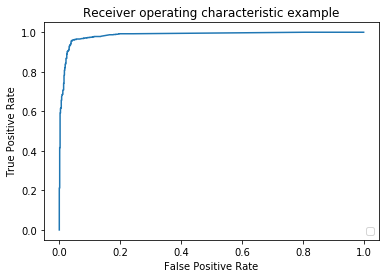

0.9850498420682817


In [57]:
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
roc_auc = metrics.auc(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()
print(roc_auc)

In [52]:
auc

<function sklearn.metrics.ranking.auc(x, y, reorder='deprecated')>

W0716 13:31:14.764844 139704809899776 deprecation.py:506] From /home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                1188      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                195       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                800       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1

2438/2438 [==============================] - 0s 44us/sample - loss: 0.0417 - acc: 0.9541 - val_loss: 0.0601 - val_acc: 0.9326
Epoch 46/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0407 - acc: 0.9549 - val_loss: 0.0593 - val_acc: 0.9326
Epoch 47/1000
2438/2438 [==============================] - 0s 46us/sample - loss: 0.0409 - acc: 0.9557 - val_loss: 0.0854 - val_acc: 0.8960
Epoch 48/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0633 - acc: 0.9130 - val_loss: 0.0832 - val_acc: 0.9118
Epoch 49/1000
2438/2438 [==============================] - 0s 41us/sample - loss: 0.0708 - acc: 0.9258 - val_loss: 0.0782 - val_acc: 0.9151
Epoch 50/1000
2438/2438 [==============================] - 0s 45us/sample - loss: 0.0663 - acc: 0.9290 - val_loss: 0.0769 - val_acc: 0.9126
Epoch 51/1000
2438/2438 [==============================] - 0s 37us/sample - loss: 0.0643 - acc: 0.9303 - val_loss: 0.0783 - val_acc: 0.9101
Epoch 52/1000
2438/2438 [=========

2438/2438 [==============================] - 0s 55us/sample - loss: 0.0415 - acc: 0.9549 - val_loss: 0.0561 - val_acc: 0.9359
Epoch 104/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0403 - acc: 0.9549 - val_loss: 0.0541 - val_acc: 0.9384
Epoch 105/1000
2438/2438 [==============================] - 0s 48us/sample - loss: 0.0401 - acc: 0.9537 - val_loss: 0.0567 - val_acc: 0.9334
Epoch 106/1000
2438/2438 [==============================] - 0s 57us/sample - loss: 0.0401 - acc: 0.9528 - val_loss: 0.0532 - val_acc: 0.9393
Epoch 107/1000
2438/2438 [==============================] - 0s 55us/sample - loss: 0.0404 - acc: 0.9528 - val_loss: 0.0524 - val_acc: 0.9409
Epoch 108/1000
2438/2438 [==============================] - 0s 55us/sample - loss: 0.0399 - acc: 0.9537 - val_loss: 0.0564 - val_acc: 0.9368
Epoch 109/1000
2438/2438 [==============================] - 0s 52us/sample - loss: 0.0409 - acc: 0.9553 - val_loss: 0.0567 - val_acc: 0.9343
Epoch 110/1000
2438/2438 [==

2438/2438 [==============================] - 0s 45us/sample - loss: 0.0368 - acc: 0.9569 - val_loss: 0.0578 - val_acc: 0.9309
Epoch 162/1000
2438/2438 [==============================] - 0s 45us/sample - loss: 0.0374 - acc: 0.9545 - val_loss: 0.0526 - val_acc: 0.9393
Epoch 163/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0376 - acc: 0.9565 - val_loss: 0.0546 - val_acc: 0.9376
Epoch 164/1000
2438/2438 [==============================] - 0s 41us/sample - loss: 0.0366 - acc: 0.9561 - val_loss: 0.0532 - val_acc: 0.9376
Epoch 165/1000
2438/2438 [==============================] - 0s 42us/sample - loss: 0.0370 - acc: 0.9569 - val_loss: 0.0528 - val_acc: 0.9401
Epoch 166/1000
2438/2438 [==============================] - 0s 39us/sample - loss: 0.0370 - acc: 0.9561 - val_loss: 0.0536 - val_acc: 0.9368
Epoch 167/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0367 - acc: 0.9573 - val_loss: 0.0538 - val_acc: 0.9376
Epoch 168/1000
2438/2438 [==

2438/2438 [==============================] - 0s 43us/sample - loss: 0.0351 - acc: 0.9578 - val_loss: 0.0529 - val_acc: 0.9409
Epoch 220/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0350 - acc: 0.9565 - val_loss: 0.0572 - val_acc: 0.9334
Epoch 221/1000
2438/2438 [==============================] - 0s 45us/sample - loss: 0.0356 - acc: 0.9586 - val_loss: 0.0550 - val_acc: 0.9351
Epoch 222/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0339 - acc: 0.9594 - val_loss: 0.0563 - val_acc: 0.9368
Epoch 223/1000
2438/2438 [==============================] - 0s 46us/sample - loss: 0.0343 - acc: 0.9582 - val_loss: 0.0549 - val_acc: 0.9376
Epoch 224/1000
2438/2438 [==============================] - 0s 35us/sample - loss: 0.0346 - acc: 0.9602 - val_loss: 0.0538 - val_acc: 0.9384
Epoch 225/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0349 - acc: 0.9565 - val_loss: 0.0537 - val_acc: 0.9393
Epoch 226/1000
2438/2438 [==

2438/2438 [==============================] - 0s 49us/sample - loss: 0.0325 - acc: 0.9614 - val_loss: 0.0570 - val_acc: 0.9351
Epoch 278/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0330 - acc: 0.9594 - val_loss: 0.0562 - val_acc: 0.9368
Epoch 279/1000
2438/2438 [==============================] - 0s 40us/sample - loss: 0.0394 - acc: 0.9483 - val_loss: 0.0577 - val_acc: 0.9318
Epoch 280/1000
2438/2438 [==============================] - 0s 45us/sample - loss: 0.0372 - acc: 0.9553 - val_loss: 0.0562 - val_acc: 0.9359
Epoch 281/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0356 - acc: 0.9545 - val_loss: 0.0604 - val_acc: 0.9309
Epoch 282/1000
2438/2438 [==============================] - 0s 49us/sample - loss: 0.0352 - acc: 0.9582 - val_loss: 0.0578 - val_acc: 0.9309
Epoch 283/1000
2438/2438 [==============================] - 0s 52us/sample - loss: 0.0374 - acc: 0.9549 - val_loss: 0.0556 - val_acc: 0.9359
Epoch 284/1000
2438/2438 [==

2438/2438 [==============================] - 0s 60us/sample - loss: 0.0358 - acc: 0.9590 - val_loss: 0.0564 - val_acc: 0.9351
Epoch 336/1000
2438/2438 [==============================] - 0s 52us/sample - loss: 0.0337 - acc: 0.9598 - val_loss: 0.0571 - val_acc: 0.9285
Epoch 337/1000
2438/2438 [==============================] - 0s 60us/sample - loss: 0.0323 - acc: 0.9610 - val_loss: 0.0568 - val_acc: 0.9351
Epoch 338/1000
2438/2438 [==============================] - 0s 57us/sample - loss: 0.0337 - acc: 0.9598 - val_loss: 0.0552 - val_acc: 0.9359
Epoch 339/1000
2438/2438 [==============================] - 0s 58us/sample - loss: 0.0342 - acc: 0.9582 - val_loss: 0.0564 - val_acc: 0.9351
Epoch 340/1000
2438/2438 [==============================] - 0s 58us/sample - loss: 0.0337 - acc: 0.9586 - val_loss: 0.0566 - val_acc: 0.9293
Epoch 341/1000
2438/2438 [==============================] - 0s 59us/sample - loss: 0.0335 - acc: 0.9549 - val_loss: 0.0562 - val_acc: 0.9359
Epoch 342/1000
2438/2438 [==

2438/2438 [==============================] - 0s 50us/sample - loss: 0.1090 - acc: 0.8733 - val_loss: 0.0791 - val_acc: 0.9151
Epoch 394/1000
2438/2438 [==============================] - 0s 51us/sample - loss: 0.0590 - acc: 0.9331 - val_loss: 0.0751 - val_acc: 0.9135
Epoch 395/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0561 - acc: 0.9352 - val_loss: 0.0763 - val_acc: 0.9135
Epoch 396/1000
2438/2438 [==============================] - 0s 46us/sample - loss: 0.0566 - acc: 0.9360 - val_loss: 0.0759 - val_acc: 0.9118
Epoch 397/1000
2438/2438 [==============================] - 0s 48us/sample - loss: 0.0554 - acc: 0.9364 - val_loss: 0.0785 - val_acc: 0.9085
Epoch 398/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0563 - acc: 0.9340 - val_loss: 0.0745 - val_acc: 0.9135
Epoch 399/1000
2438/2438 [==============================] - 0s 60us/sample - loss: 0.0553 - acc: 0.9340 - val_loss: 0.0741 - val_acc: 0.9135
Epoch 400/1000
2438/2438 [==

2438/2438 [==============================] - 0s 65us/sample - loss: 0.0566 - acc: 0.9336 - val_loss: 0.0740 - val_acc: 0.9151
Epoch 452/1000
2438/2438 [==============================] - 0s 54us/sample - loss: 0.0531 - acc: 0.9364 - val_loss: 0.0737 - val_acc: 0.9126
Epoch 453/1000
2438/2438 [==============================] - 0s 55us/sample - loss: 0.0523 - acc: 0.9377 - val_loss: 0.0711 - val_acc: 0.9193
Epoch 454/1000
2438/2438 [==============================] - 0s 54us/sample - loss: 0.0535 - acc: 0.9360 - val_loss: 0.0758 - val_acc: 0.9160
Epoch 455/1000
2438/2438 [==============================] - 0s 58us/sample - loss: 0.0530 - acc: 0.9372 - val_loss: 0.0727 - val_acc: 0.9176
Epoch 456/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0522 - acc: 0.9377 - val_loss: 0.0724 - val_acc: 0.9176
Epoch 457/1000
2438/2438 [==============================] - 0s 41us/sample - loss: 0.0526 - acc: 0.9352 - val_loss: 0.0733 - val_acc: 0.9151
Epoch 458/1000
2438/2438 [==

2438/2438 [==============================] - 0s 46us/sample - loss: 0.0530 - acc: 0.9381 - val_loss: 0.0709 - val_acc: 0.9201
Epoch 510/1000
2438/2438 [==============================] - 0s 46us/sample - loss: 0.0526 - acc: 0.9377 - val_loss: 0.0722 - val_acc: 0.9151
Epoch 511/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0529 - acc: 0.9385 - val_loss: 0.0718 - val_acc: 0.9185
Epoch 512/1000
2438/2438 [==============================] - 0s 50us/sample - loss: 0.0523 - acc: 0.9385 - val_loss: 0.0717 - val_acc: 0.9185
Epoch 513/1000
2438/2438 [==============================] - 0s 49us/sample - loss: 0.0523 - acc: 0.9360 - val_loss: 0.0724 - val_acc: 0.9126
Epoch 514/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0529 - acc: 0.9372 - val_loss: 0.0717 - val_acc: 0.9201
Epoch 515/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0528 - acc: 0.9381 - val_loss: 0.0711 - val_acc: 0.9193
Epoch 516/1000
2438/2438 [==

2438/2438 [==============================] - 0s 38us/sample - loss: 0.0531 - acc: 0.9377 - val_loss: 0.0717 - val_acc: 0.9210
Epoch 568/1000
2438/2438 [==============================] - 0s 41us/sample - loss: 0.0529 - acc: 0.9389 - val_loss: 0.0739 - val_acc: 0.9118
Epoch 569/1000
2438/2438 [==============================] - 0s 42us/sample - loss: 0.0524 - acc: 0.9368 - val_loss: 0.0739 - val_acc: 0.9110
Epoch 570/1000
2438/2438 [==============================] - 0s 45us/sample - loss: 0.0521 - acc: 0.9377 - val_loss: 0.0720 - val_acc: 0.9185
Epoch 571/1000
2438/2438 [==============================] - 0s 48us/sample - loss: 0.0515 - acc: 0.9397 - val_loss: 0.0721 - val_acc: 0.9185
Epoch 572/1000
2438/2438 [==============================] - 0s 42us/sample - loss: 0.0512 - acc: 0.9405 - val_loss: 0.0727 - val_acc: 0.9143
Epoch 573/1000
2438/2438 [==============================] - 0s 38us/sample - loss: 0.0539 - acc: 0.9364 - val_loss: 0.0717 - val_acc: 0.9201
Epoch 574/1000
2438/2438 [==

2438/2438 [==============================] - 0s 49us/sample - loss: 0.0736 - acc: 0.9098 - val_loss: 0.0921 - val_acc: 0.8877
Epoch 626/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0780 - acc: 0.9032 - val_loss: 0.0894 - val_acc: 0.8910
Epoch 627/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0747 - acc: 0.9073 - val_loss: 0.0870 - val_acc: 0.8977
Epoch 628/1000
2438/2438 [==============================] - 0s 47us/sample - loss: 0.0741 - acc: 0.9085 - val_loss: 0.0908 - val_acc: 0.8902
Epoch 629/1000
2438/2438 [==============================] - 0s 52us/sample - loss: 0.0728 - acc: 0.9110 - val_loss: 0.0908 - val_acc: 0.8918
Epoch 630/1000
2438/2438 [==============================] - 0s 49us/sample - loss: 0.0731 - acc: 0.9094 - val_loss: 0.0915 - val_acc: 0.8902
Epoch 631/1000
2438/2438 [==============================] - 0s 49us/sample - loss: 0.0728 - acc: 0.9102 - val_loss: 0.0881 - val_acc: 0.8943
Epoch 632/1000
2438/2438 [==

2438/2438 [==============================] - 0s 42us/sample - loss: 0.0735 - acc: 0.9094 - val_loss: 0.0896 - val_acc: 0.8902
Epoch 684/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0722 - acc: 0.9118 - val_loss: 0.0892 - val_acc: 0.8902
Epoch 685/1000
2438/2438 [==============================] - 0s 42us/sample - loss: 0.0728 - acc: 0.9106 - val_loss: 0.0896 - val_acc: 0.8902
Epoch 686/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0730 - acc: 0.9094 - val_loss: 0.0884 - val_acc: 0.8935
Epoch 687/1000
2438/2438 [==============================] - 0s 42us/sample - loss: 0.0755 - acc: 0.9081 - val_loss: 0.0879 - val_acc: 0.8910
Epoch 688/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0746 - acc: 0.9081 - val_loss: 0.0882 - val_acc: 0.8935
Epoch 689/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0727 - acc: 0.9110 - val_loss: 0.0899 - val_acc: 0.8877
Epoch 690/1000
2438/2438 [==

2438/2438 [==============================] - 0s 56us/sample - loss: 0.0516 - acc: 0.9389 - val_loss: 0.0750 - val_acc: 0.9143
Epoch 742/1000
2438/2438 [==============================] - 0s 60us/sample - loss: 0.0508 - acc: 0.9397 - val_loss: 0.0768 - val_acc: 0.9093
Epoch 743/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0520 - acc: 0.9381 - val_loss: 0.0736 - val_acc: 0.9135
Epoch 744/1000
2438/2438 [==============================] - 0s 42us/sample - loss: 0.0511 - acc: 0.9393 - val_loss: 0.0750 - val_acc: 0.9151
Epoch 745/1000
2438/2438 [==============================] - 0s 46us/sample - loss: 0.0507 - acc: 0.9409 - val_loss: 0.0741 - val_acc: 0.9118
Epoch 746/1000
2438/2438 [==============================] - 0s 46us/sample - loss: 0.0508 - acc: 0.9385 - val_loss: 0.0746 - val_acc: 0.9168
Epoch 747/1000
2438/2438 [==============================] - 0s 49us/sample - loss: 0.0504 - acc: 0.9401 - val_loss: 0.0740 - val_acc: 0.9176
Epoch 748/1000
2438/2438 [==

2438/2438 [==============================] - 0s 49us/sample - loss: 0.0527 - acc: 0.9385 - val_loss: 0.0711 - val_acc: 0.9193
Epoch 800/1000
2438/2438 [==============================] - 0s 52us/sample - loss: 0.0513 - acc: 0.9385 - val_loss: 0.0705 - val_acc: 0.9176
Epoch 801/1000
2438/2438 [==============================] - 0s 54us/sample - loss: 0.0510 - acc: 0.9397 - val_loss: 0.0720 - val_acc: 0.9160
Epoch 802/1000
2438/2438 [==============================] - 0s 53us/sample - loss: 0.0503 - acc: 0.9409 - val_loss: 0.0706 - val_acc: 0.9176
Epoch 803/1000
2438/2438 [==============================] - 0s 46us/sample - loss: 0.0501 - acc: 0.9401 - val_loss: 0.0687 - val_acc: 0.9201
Epoch 804/1000
2438/2438 [==============================] - 0s 48us/sample - loss: 0.0508 - acc: 0.9405 - val_loss: 0.0719 - val_acc: 0.9160
Epoch 805/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0501 - acc: 0.9418 - val_loss: 0.0717 - val_acc: 0.9193
Epoch 806/1000
2438/2438 [==

2438/2438 [==============================] - 0s 47us/sample - loss: 0.0296 - acc: 0.9655 - val_loss: 0.0582 - val_acc: 0.9326
Epoch 858/1000
2438/2438 [==============================] - 0s 58us/sample - loss: 0.0289 - acc: 0.9668 - val_loss: 0.0597 - val_acc: 0.9301
Epoch 859/1000
2438/2438 [==============================] - 0s 52us/sample - loss: 0.0293 - acc: 0.9664 - val_loss: 0.0595 - val_acc: 0.9301
Epoch 860/1000
2438/2438 [==============================] - 0s 63us/sample - loss: 0.0302 - acc: 0.9619 - val_loss: 0.0632 - val_acc: 0.9301
Epoch 861/1000
2438/2438 [==============================] - 0s 48us/sample - loss: 0.0322 - acc: 0.9610 - val_loss: 0.0585 - val_acc: 0.9326
Epoch 862/1000
2438/2438 [==============================] - 0s 51us/sample - loss: 0.0295 - acc: 0.9651 - val_loss: 0.0579 - val_acc: 0.9326
Epoch 863/1000
2438/2438 [==============================] - 0s 63us/sample - loss: 0.0290 - acc: 0.9668 - val_loss: 0.0566 - val_acc: 0.9351
Epoch 864/1000
2438/2438 [==

2438/2438 [==============================] - 0s 50us/sample - loss: 0.0285 - acc: 0.9647 - val_loss: 0.0593 - val_acc: 0.9343
Epoch 916/1000
2438/2438 [==============================] - 0s 61us/sample - loss: 0.0297 - acc: 0.9647 - val_loss: 0.0552 - val_acc: 0.9384
Epoch 917/1000
2438/2438 [==============================] - 0s 61us/sample - loss: 0.0301 - acc: 0.9635 - val_loss: 0.0554 - val_acc: 0.9309
Epoch 918/1000
2438/2438 [==============================] - 0s 49us/sample - loss: 0.0279 - acc: 0.9655 - val_loss: 0.0593 - val_acc: 0.9309
Epoch 919/1000
2438/2438 [==============================] - 0s 49us/sample - loss: 0.0266 - acc: 0.9692 - val_loss: 0.0555 - val_acc: 0.9334
Epoch 920/1000
2438/2438 [==============================] - 0s 51us/sample - loss: 0.0262 - acc: 0.9680 - val_loss: 0.0560 - val_acc: 0.9368
Epoch 921/1000
2438/2438 [==============================] - 0s 53us/sample - loss: 0.0261 - acc: 0.9688 - val_loss: 0.0571 - val_acc: 0.9318
Epoch 922/1000
2438/2438 [==

2438/2438 [==============================] - 0s 40us/sample - loss: 0.0285 - acc: 0.9647 - val_loss: 0.0523 - val_acc: 0.9376
Epoch 974/1000
2438/2438 [==============================] - 0s 44us/sample - loss: 0.0262 - acc: 0.9676 - val_loss: 0.0506 - val_acc: 0.9426
Epoch 975/1000
2438/2438 [==============================] - 0s 43us/sample - loss: 0.0267 - acc: 0.9684 - val_loss: 0.0587 - val_acc: 0.9343
Epoch 976/1000
2438/2438 [==============================] - 0s 42us/sample - loss: 0.0291 - acc: 0.9660 - val_loss: 0.0581 - val_acc: 0.9343
Epoch 977/1000
2438/2438 [==============================] - 0s 34us/sample - loss: 0.0274 - acc: 0.9668 - val_loss: 0.0590 - val_acc: 0.9318
Epoch 978/1000
2438/2438 [==============================] - 0s 35us/sample - loss: 0.0272 - acc: 0.9688 - val_loss: 0.0553 - val_acc: 0.9326
Epoch 979/1000
2438/2438 [==============================] - 0s 35us/sample - loss: 0.0289 - acc: 0.9655 - val_loss: 0.0561 - val_acc: 0.9351
Epoch 980/1000
2438/2438 [==

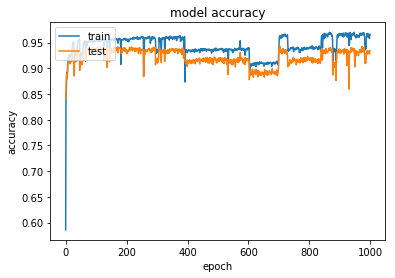

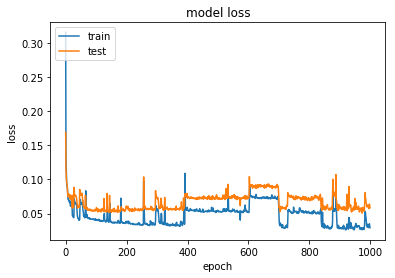

In [30]:
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
# Import `Sequential` from `keras.models`
# Split the Data Set 
X6_train, X6_test, y6_train, y6_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(len(copy_df.columns),)))

# Add one hidden layer 
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))


# Add an output layer 
model.add(Dense(1, activation='tanh'))
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X6_train, y6_train,epochs=1000,validation_split=0.33, batch_size=100, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [28]:
y2_pred = y2_pred[:,1]
auc = roc_auc_score(y2_train,y2_pred)
print('AUC: %.3f' % auc)

IndexError: too many indices for array

In [ ]:
print(len('data/data/2019-04-18/enrichment/cert_info/1.json'))

In [ ]:
importances = ranFor.feature_importances_
std = np.std([tree.feature_importances_ for tree in ranFor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X2_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X2_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2_train.shape[1]), indices)
plt.xlim([-1, X2_train.shape[1]])
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(copy3_df, target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
y3_score=ranFor.fit(X3_train,y3_train)
y3_pred=ranFor.predict(X3_test)
y4
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))

print (metrics.confusion_matrix(y3_test, y3_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y3_test, y3_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))

In [ ]:
print(__doc__)
import random
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
classifier=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
n_samples, n_features = copy_df.shape
#X3_train, X3_test, y3_train, y3_test = train_test_split(copy3_df, target_function_list, test_size=0.3, random_state=0)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
#classifier = svm.SVC(kernel='linear', probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

X = copy_df
y = target_function_list
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = copy_df
y = target_function_list
n_samples, n_features = X.shape

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = copy_df
y = target_function_list

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(1)